<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1.8_0405_yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [3]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [4]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [5]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


In [6]:
train_df.isnull().sum()

,0
id,0
gender,0
star_sign,86
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,90


# **2.資料前處理**






## 2.1 缺失比例查看

In [7]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


## 2.2 刪除欄位

In [8]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

## 2.3 處理特殊值



In [9]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

In [10]:
cat_cols = ["phone_os", "sleepiness"]

In [11]:
import numpy as np
missing_values = ['', 'N/A', 'missing', '#NUM!']

# 將非標準缺失值轉為 NaN
train_df = train_df.replace(missing_values, np.nan)

train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

In [12]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91


In [13]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 預處理函數：清除空白、標準化格式，保留 NaN
def clean_phone_os(df):
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x.strip() if isinstance(x, str) else x  # 保留 NaN
    )
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x if (x in valid_os) else ('other' if pd.notna(x) else np.nan)  # NaN 繼續 NaN
    )
    return df

# 套用預處理
train_df = clean_phone_os(train_df)
test_df = clean_phone_os(test_df)

# 建立並訓練 LabelEncoder，忽略 NaN
le = LabelEncoder()
le.fit(train_df['phone_os'].dropna())  # 不把 NaN 當作一個類別

# 類別對應表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# Label Encoding，NaN 保持 NaN
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)

# 驗證結果
print("train_df['phone_os'] dtype：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 前幾筆：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1), 'other': np.int64(2)}
train_df['phone_os'] dtype： float64
train_df['phone_os'] 前幾筆：
 0    1.0
1    1.0
2    NaN
3    1.0
4    0.0
Name: phone_os, dtype: float64


In [15]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1.0,154.0,43.0,NaN,NaN,583.0,0.0
1,2,1.0,156.0,47.0,NaN,130.0,NaN,3.5
2,1,NaN,170.0,61.0,NaN,90.0,540.0,NaN
3,1,1.0,170.0,62.0,4.0,100.0,NaN,5.0
4,2,0.0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...,...
418,1,0.0,166.0,66.0,4.0,90.0,1000.0,1.0
419,1,0.0,176.0,65.0,4.0,87.0,1300.0,2.0
420,1,1.0,174.0,72.0,2.0,NaN,2000.0,9.0
421,2,NaN,167.0,50.0,3.0,180.0,483.0,10.0


In [16]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,0,1.0,200.0,100.0,1.0,87.0,87.0,87.0
1,0,1.0,175.0,80.0,3.0,NaN,2000.0,NaN
2,0,1.0,155.0,45.0,3.0,150.0,NaN,9.0
3,0,1.0,173.0,85.0,4.0,NaN,NaN,15.0
4,0,0.0,164.0,57.0,4.0,130.0,505.0,2.0
...,...,...,...,...,...,...,...,...
421,0,1.0,160.0,70.0,4.0,NaN,500.0,5.0
422,0,0.0,162.0,54.0,3.0,180.0,462.0,5.0
423,0,1.0,173.0,66.0,NaN,135.0,102.0,11.1
424,0,NaN,165.0,53.0,NaN,110.0,507.0,416.0


In [17]:
# 印出 gender 的唯一值
print(train_df['gender'].unique())

[2 1]


<Axes: >

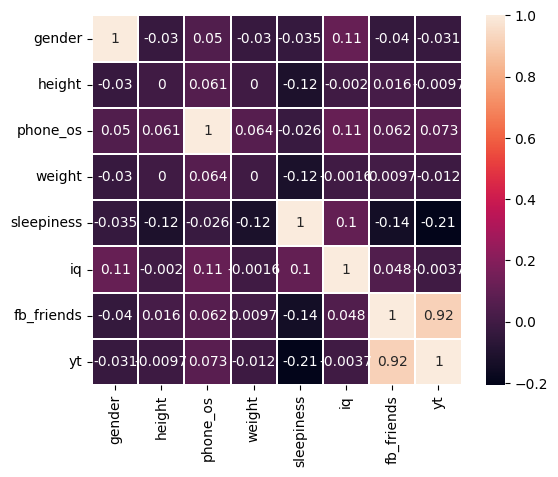

In [18]:
import seaborn as sns
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

## 2.4 檢查fb的資料分布

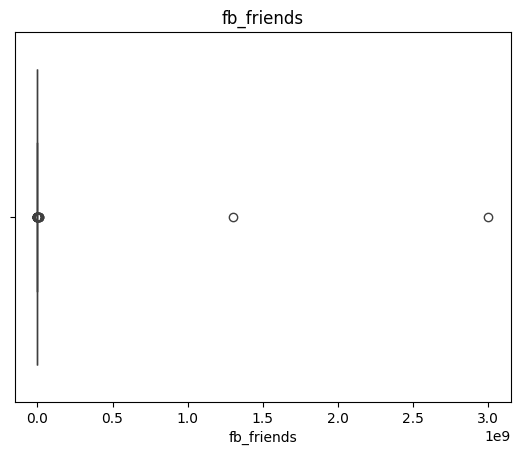

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

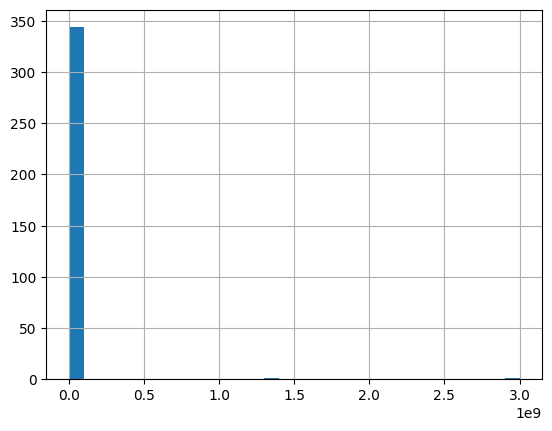

In [20]:
train_df['fb_friends'].hist(bins=30)
plt.show()

In [21]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] *= -1
test_df.loc[test_df['fb_friends'] < 0, 'fb_friends'] *= -1

In [22]:
# 壓縮 > 5,000的資料
def process_fb_friends_mobile_traffic(df, upper_limit=3000):
    df = df.copy()
    df['is_outlier_fb_friends'] = df['fb_friends'] >= upper_limit
    df['fb_friends'] = df['fb_friends'].clip(upper=upper_limit)
    return df

train_df = process_fb_friends_mobile_traffic(train_df)
test_df = process_fb_friends_mobile_traffic(test_df)

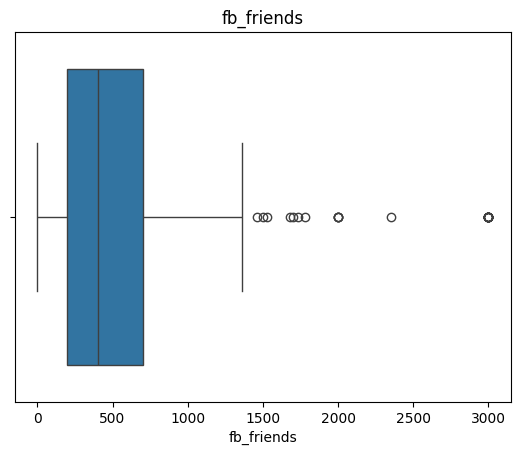

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [24]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0


## 2.5 檢查yt資料分布

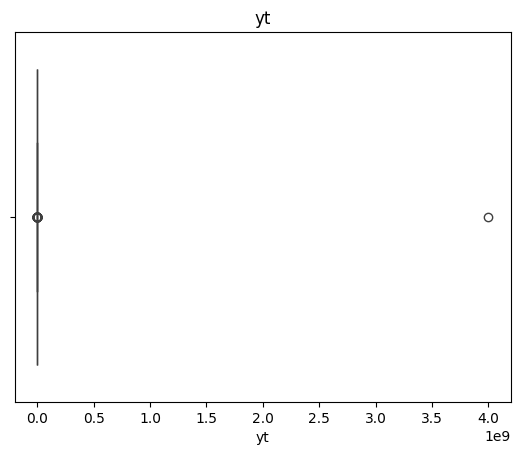

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [26]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] *= -1
test_df.loc[test_df['yt'] < 0, 'yt'] *= -1

In [27]:
# 做clip 處理資料差距
def process_yt_mobile_traffic(df, upper_limit=500):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    return df

train_df = process_yt_mobile_traffic(train_df)
test_df = process_yt_mobile_traffic(test_df)

In [28]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


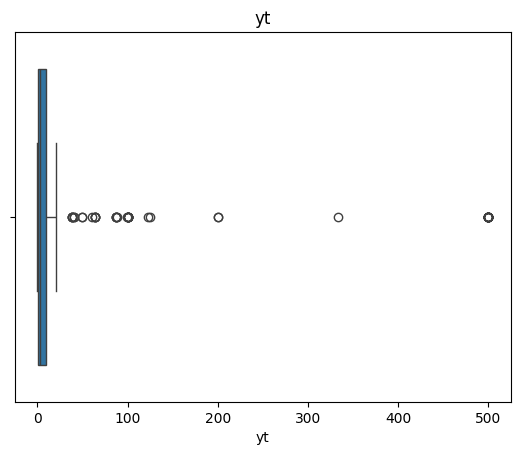

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

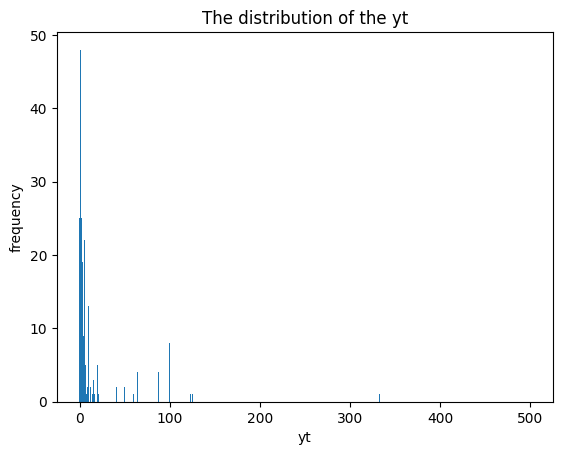

In [30]:
sleepiness_values = train_df['yt'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['yt'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('yt')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the yt')
plt.show()

##2.6 檢查height分布




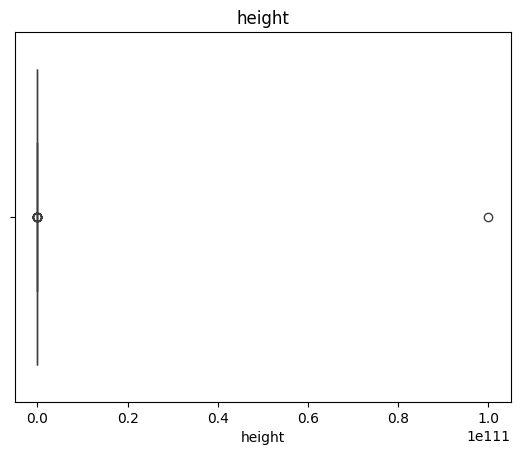

In [31]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [32]:
train_df.loc[train_df['height'] < 130, 'height'] = 140
test_df.loc[test_df['height'] < 130, 'height'] = 140

In [33]:
def process_height_mobile_traffic(df, upper_limit=200):
    df = df.copy()
    df['is_outlier_height'] = df['height'] >= upper_limit
    df['height'] = df['height'].clip(upper=upper_limit)
    return df

train_df = process_height_mobile_traffic(train_df)
test_df = process_height_mobile_traffic(test_df)

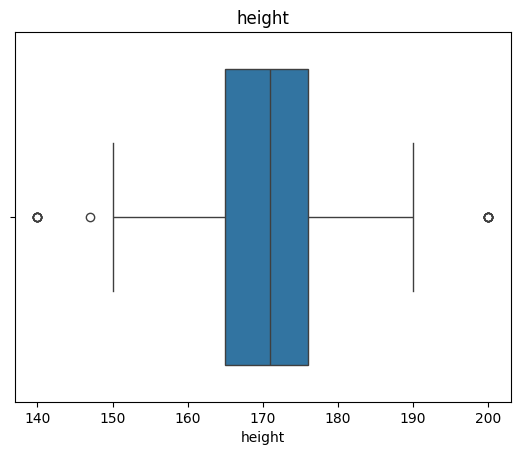

In [34]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [35]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


## 2.7 檢查weight分布

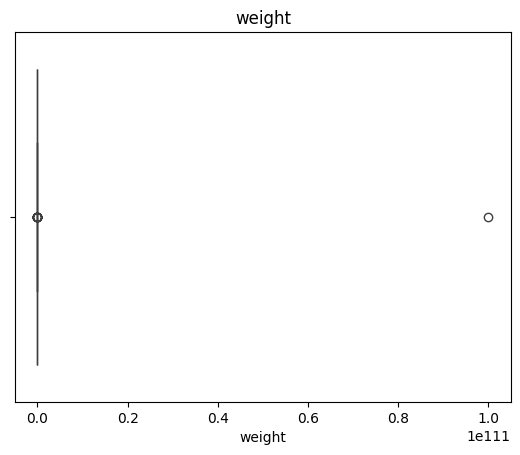

In [36]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [37]:
train_df.loc[(train_df['weight'] < 30), 'weight'] = 40
test_df.loc[(test_df['weight'] < 30), 'weight'] = 40

In [38]:
def process_weight_mobile_traffic(df, upper_limit=130):
    df = df.copy()
    df['is_outlier_weight'] = df['weight'] >= upper_limit
    df['weight'] = df['weight'].clip(upper=upper_limit)
    return df

train_df = process_weight_mobile_traffic(train_df)
test_df = process_weight_mobile_traffic(test_df)

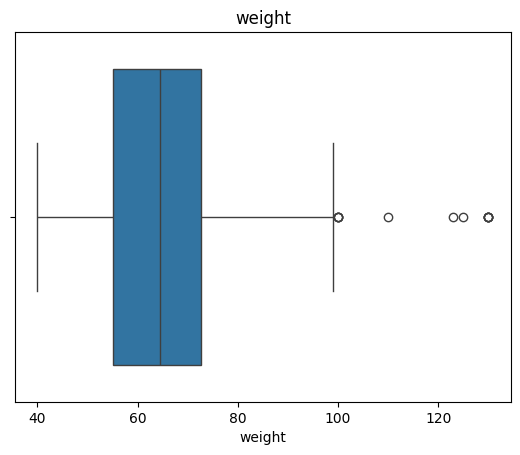

In [39]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [40]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


## 2.8 檢查IQ分布

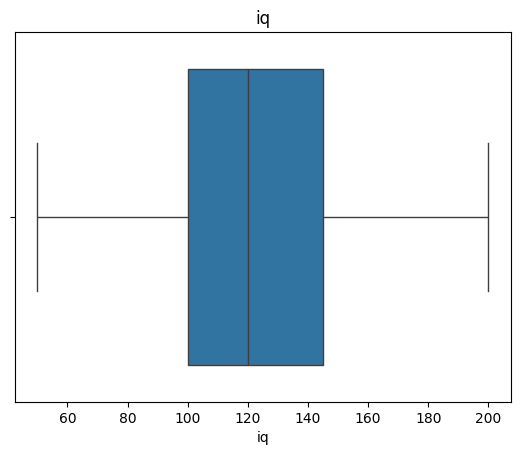

In [41]:
sns.boxplot(x=train_df['iq'])
plt.title("iq")
plt.show()

## 2.9 檢查sleepiness分布

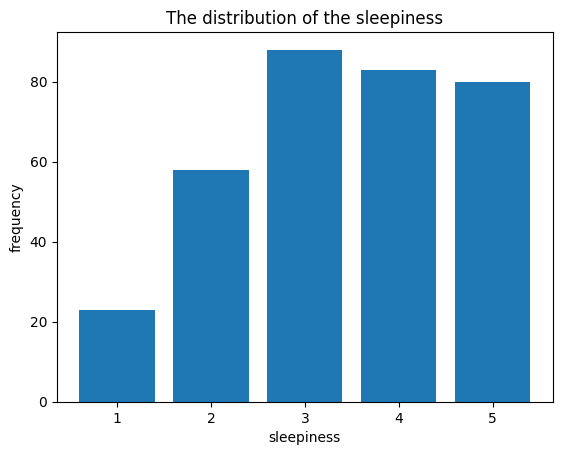

In [42]:
sleepiness_values = train_df['sleepiness'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['sleepiness'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('sleepiness')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

## 2.10 標記離群值欄位

處理 train_df

In [43]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked

In [44]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 88 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 97 筆離群值（不在 [28.38, 99.38] 內）
 iq: 已標記 79 筆離群值（不在 [32.5, 212.5] 內）
 fb_friends: 已標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
 yt: 已標記 146 筆離群值（不在 [-12.5, 23.5] 內）


處理 test_df

In [45]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [46]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 105 筆離群值（不在 [28.38, 99.38] 內）
【iq】在 test 中標記 92 筆離群值（不在 [32.5, 212.5] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
【yt】在 test 中標記 200 筆離群值（不在 [-12.5, 23.5] 內）


In [47]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

In [48]:
# 自動抓出含有 'is_outlier' 的欄位
outlier_cols = [col for col in train_df.columns if 'is_outlier' in col]

# 對這些欄位做 label encoding（其實 bool 直接轉 int 就行）
for col in outlier_cols:
    train_df[col] = train_df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# **3. 分區填補缺失值**

In [49]:
test_df['gender'] = np.nan

# 3.1 資料分布

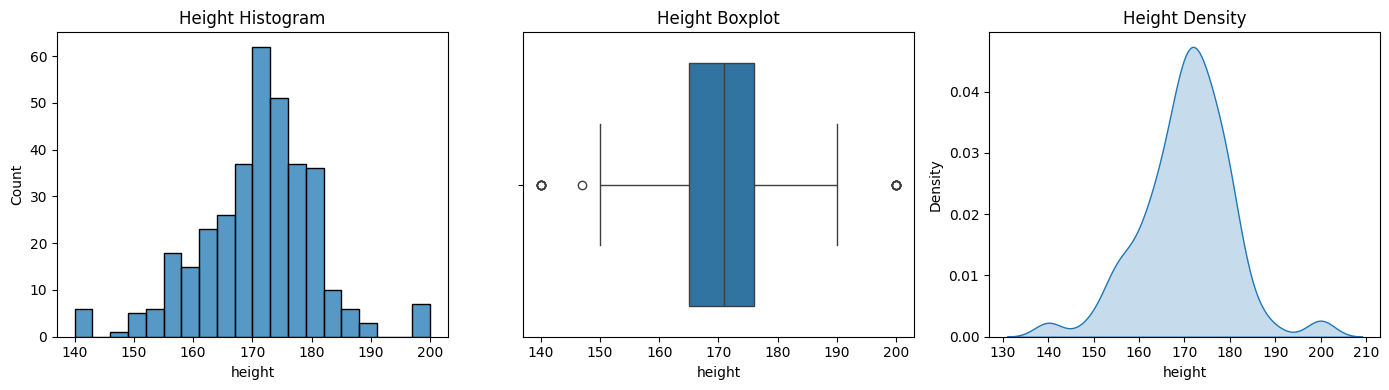

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['height'], bins=20, kde=False)
plt.title('Height Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['height'])
plt.title('Height Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['height'], fill=True)
plt.title('Height Density')

plt.tight_layout()
plt.show()


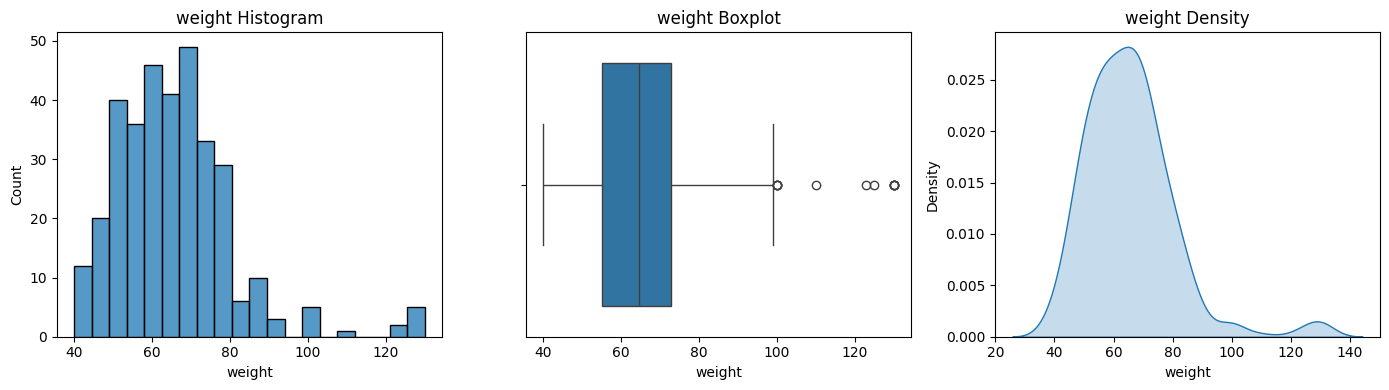

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['weight'], bins=20, kde=False)
plt.title('weight Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['weight'])
plt.title('weight Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['weight'], fill=True)
plt.title('weight Density')

plt.tight_layout()
plt.show()


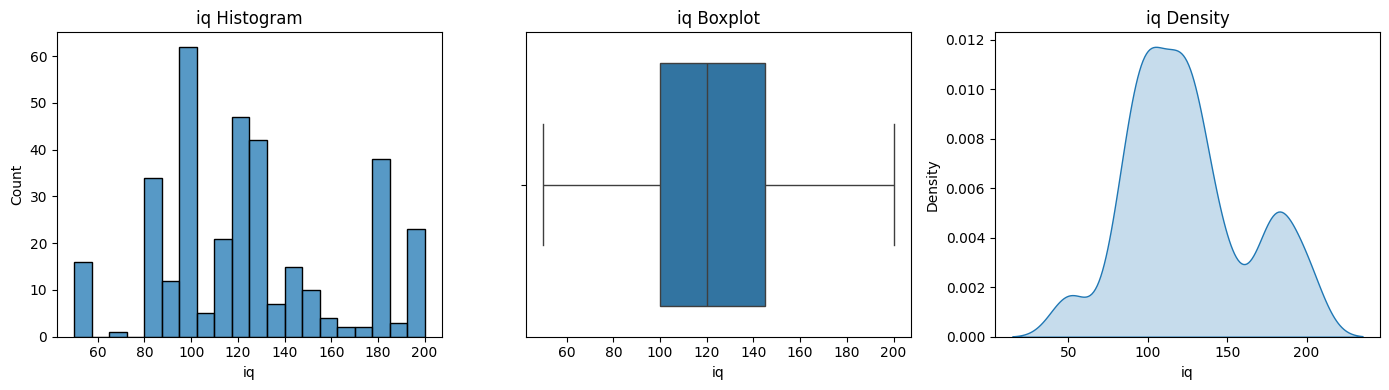

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['iq'], bins=20, kde=False)
plt.title('iq Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['iq'])
plt.title('iq Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['iq'], fill=True)
plt.title('iq Density')

plt.tight_layout()
plt.show()


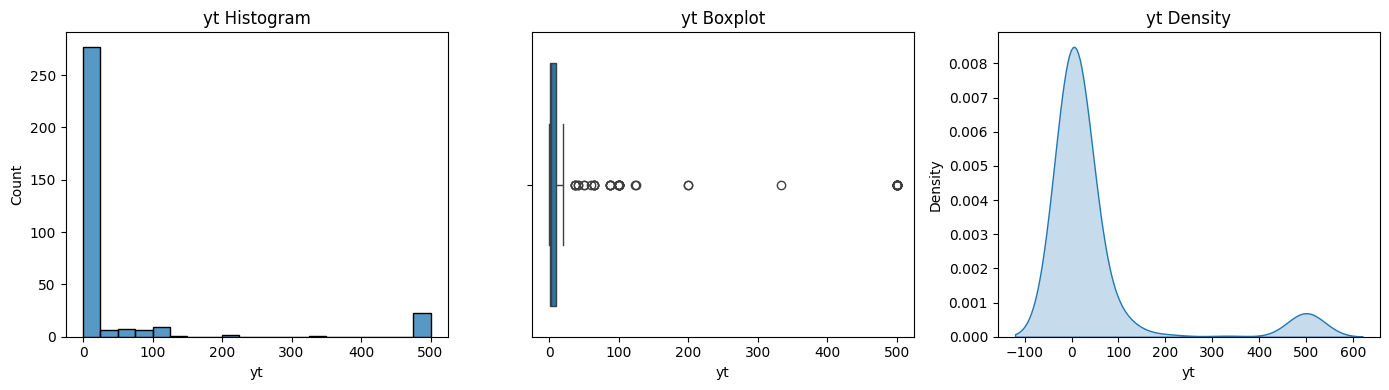

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['yt'], bins=20, kde=False)
plt.title('yt Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['yt'])
plt.title('yt Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['yt'], fill=True)
plt.title('yt Density')

plt.tight_layout()
plt.show()


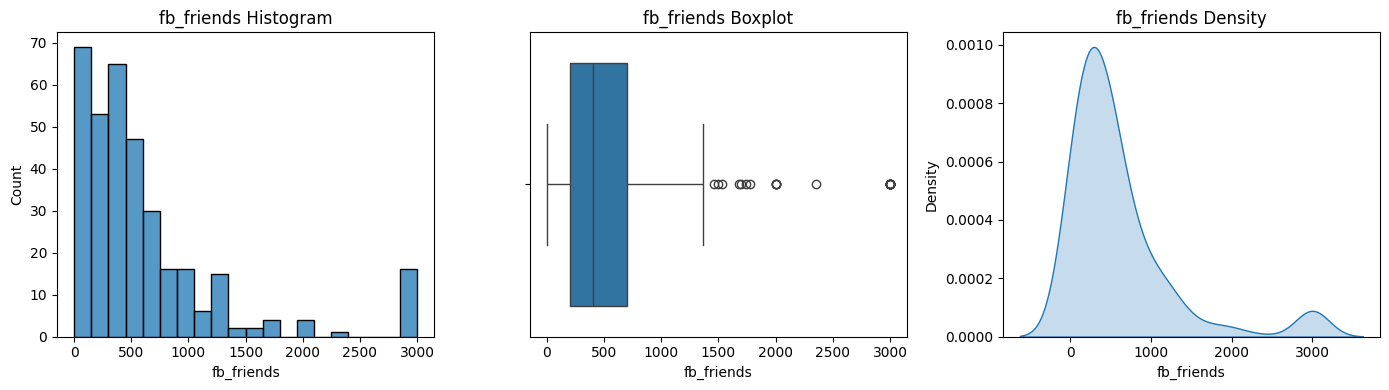

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,4))

# Histogram
plt.subplot(1,3,1)
sns.histplot(train_df['fb_friends'], bins=20, kde=False)
plt.title('fb_friends Histogram')

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=train_df['fb_friends'])
plt.title('fb_friends Boxplot')

# Density plot
plt.subplot(1,3,3)
sns.kdeplot(train_df['fb_friends'], fill=True)
plt.title('fb_friends Density')

plt.tight_layout()
plt.show()

# height 分割區域 (不跑)

In [ ]:
bins = [0, 160, 175, 999]  # 999 是最大值保險用
labels = ['short', 'medium', 'tall']
train_df['height_group'] = pd.cut(train_df['height'], bins=bins, labels=labels)

# height 與其他特徵關聯

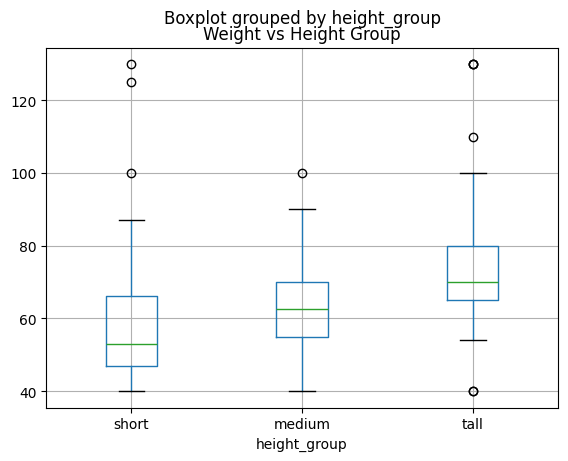

<ipython-input-206-22d0699ed828>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby('height_group')['weight'].describe()


,count,mean,std,min,25%,50%,75%,max
height_group,,,,,,,,
short,42.0,59.571429,20.716604,40.0,47.0,53.0,66.25,130.0
medium,160.0,63.281250,10.174683,40.0,55.0,62.5,70.00,100.0
tall,77.0,73.610390,16.625247,40.0,65.0,70.0,80.00,130.0


In [ ]:
train_df.boxplot(column='weight', by='height_group')
plt.title('Weight vs Height Group')
plt.show()

train_df.groupby('height_group')['weight'].describe()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas

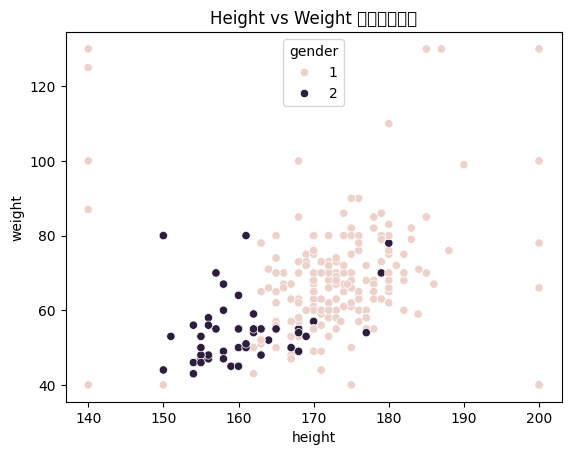

In [ ]:
sns.scatterplot(x='height', y='weight', hue='gender', data=train_df)
plt.title('Height vs Weight 分性別散佈圖')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


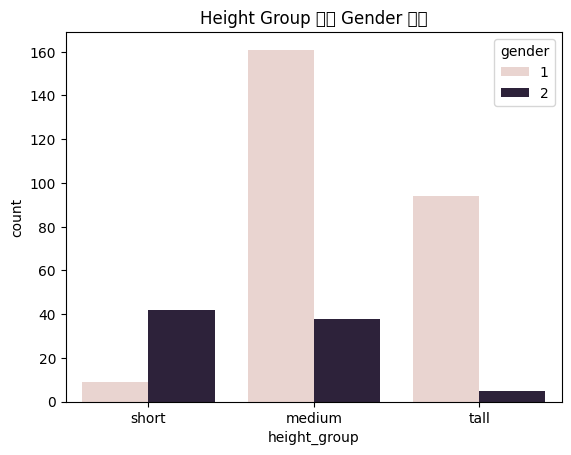

In [ ]:
import seaborn as sns

sns.countplot(x='height_group', hue='gender', data=train_df)
plt.title('Height Group 中的 Gender 分佈')
plt.show()


# weight 分割區域 (不跑)

In [ ]:
bins = [0, 55, 80, 100, 999]  # 999 是最大值保險用
labels = ['55', '80','100','999']
train_df['weight_group'] = pd.cut(train_df['weight'], bins=bins, labels=labels)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


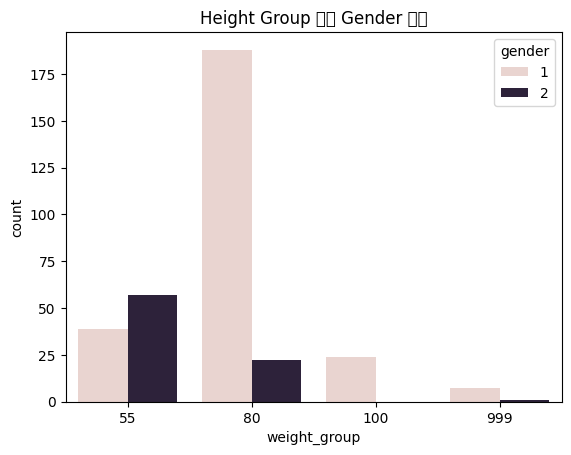

In [ ]:
import seaborn as sns

sns.countplot(x='weight_group', hue='gender', data=train_df)
plt.title('Height Group 中的 Gender 分佈')
plt.show()


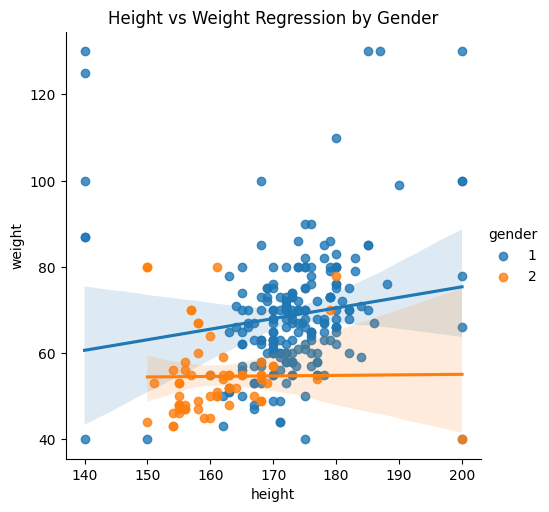

In [ ]:
sns.lmplot(x='height', y='weight', hue='gender', data=train_df)
plt.title('Height vs Weight Regression by Gender')
plt.show()


# **3. 缺失值處理**


In [55]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<Axes: >

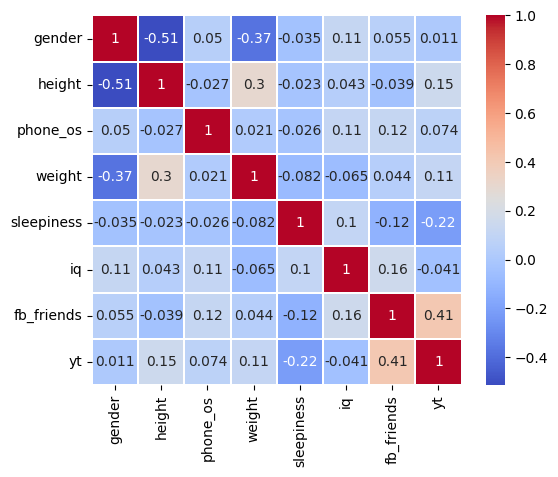

In [56]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

In [57]:
print(test_df['gender'].unique())

[nan]


In [58]:
test_df['gender'] = np.nan

# 3.1 插補模型function

**DT+KNN**

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

def dt_impute_classifier(train_df, test_df, target_col, predictor_cols, model_params=None):
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 補 predictors
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: train
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col].astype(int)

    if model_params is None:
        model_params = {'max_depth': 5, 'random_state': 42}
    model = DecisionTreeClassifier(**model_params)
    model.fit(X_train, y_train)

    # Step 3: impute train target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing).astype(int)

    # Step 4: impute test target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing).astype(int)

    # Step 5: 確保欄位型態 (重點)
    train_df[target_col] = train_df[target_col].astype(int)
    test_df[target_col] = test_df[target_col].astype(int)

    return train_df, test_df

**XG+KNN**

In [60]:
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

def xgboost_impute(train_df, test_df, target_col, predictor_cols, model_params=None):
    # Step 0: 建立 copy，不直接改原始 train_df 和 test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只作用在 copy 上
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用 copy 做）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 用 copy 去預測 target 缺失，不改 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**RandomForest+KNN**

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import numpy as np

def rf_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，不改原始的 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: predictor 缺失值用 KNN 補值 (只用在 copy)
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理（用補過的 copy）
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}
    model = RandomForestRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 只預測 target 缺失，不動其他 predictor
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: test_df 的 target 缺失值預測
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**SVM+KNN**

In [62]:
from sklearn.svm import SVR
from sklearn.impute import KNNImputer

def svm_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立副本，避免直接改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNN 只補在 copy 中
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 訓練資料處理
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'C': 1.0, 'epsilon': 0.1}
    model = SVR(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**KNN+KNN**

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

def knn_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: 建立 copy，避免改到原始 train_df / test_df
    train_df_copy = train_df.copy()
    test_df_copy = test_df.copy()

    # Step 1: KNNImputer 暫時補 predictor 缺失
    imputer = KNNImputer(n_neighbors=5)
    train_df_copy[predictor_cols] = imputer.fit_transform(train_df_copy[predictor_cols])
    test_df_copy[predictor_cols] = imputer.transform(test_df_copy[predictor_cols])

    # Step 2: 用補好的 copy 去訓練
    train_df_non_missing = train_df_copy[train_df_copy[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 3: 模型設定
    if model_params is None:
        model_params = {'n_neighbors': 5}
    model = KNeighborsRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 4: 插補 train_df target
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_copy.loc[train_df_missing.index, predictor_cols]
        train_df.loc[train_df_missing.index, target_col] = model.predict(X_train_missing)

    # Step 5: 插補 test_df target
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_copy.loc[test_df_missing.index, predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


**MICE+KNN**

In [64]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.tree import DecisionTreeRegressor


def impute_mice_train(train_df, target_col, predictor_cols, knn_params=None, mice_params=None):
    train_df = train_df.copy()

    if knn_params is None:
        knn_params = {'n_neighbors': 5}
    if mice_params is None:
        mice_params = {'estimator': DecisionTreeRegressor(max_depth=5, random_state=42),
                       'max_iter': 10, 'random_state': 42}

    # Step 1: KNN impute train predictors
    imputer_knn = KNNImputer(**knn_params)
    train_df[predictor_cols] = imputer_knn.fit_transform(train_df[predictor_cols])

    # Step 2: MICE impute train target
    imputer_mice = IterativeImputer(**mice_params)
    cols_for_mice = predictor_cols + [target_col]
    train_df[cols_for_mice] = imputer_mice.fit_transform(train_df[cols_for_mice])

    return train_df, imputer_knn, imputer_mice

def impute_mice_test(train_df, test_df, target_col, predictor_cols, imputer_knn, imputer_mice):
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Step 1: KNN impute test predictors
    test_df[predictor_cols] = imputer_knn.transform(test_df[predictor_cols])

    # Step 2: 只保留 predictor_cols + target_col，不要多的欄位
    cols_for_mice = predictor_cols + [target_col]
    combined_df = pd.concat([
        train_df[cols_for_mice],
        test_df[cols_for_mice]
    ], axis=0).reset_index(drop=True)

    # Step 3: 強制對齊 feature_names_in_
    combined_df = combined_df[imputer_mice.feature_names_in_]

    # Step 4: MICE transform
    combined_imputed = imputer_mice.transform(combined_df)
    combined_imputed_df = pd.DataFrame(combined_imputed, columns=imputer_mice.feature_names_in_)

    # Step 5: 還原 train target
    combined_imputed_df.loc[:len(train_df)-1, target_col] = train_df[target_col].values

    # Step 6: 取出 imputed test target
    test_df[target_col] = combined_imputed_df.loc[len(train_df):, target_col].values

    return test_df

**MissForest**

In [65]:
pip install MissForest

In [66]:
from missforest import MissForest
from sklearn.impute import KNNImputer
from xgboost import XGBRegressor

def knn_missforest_xgb_impute(train_df, test_df, target_col, predictor_cols, knn_params=None, mf_params=None, xgb_params=None):

    # Step 1: KNNImputer 補 predictors
    if knn_params is None:
        knn_params = {'n_neighbors': 5}
    imputer_knn = KNNImputer(**knn_params)
    train_df[predictor_cols] = imputer_knn.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer_knn.transform(test_df[predictor_cols])

    # Step 2: MissForest 補 train 的 target
    # 自動判斷 categorical features
    categorical = [col for col in train_df.columns if train_df[col].dtype in ['object', 'category']]

    mf = MissForest(max_iter=10, categorical=categorical)

    if train_df.isnull().sum().sum() > 0:
        train_imputed = mf.fit_transform(train_df)  # 訓練集填補
        train_df = pd.DataFrame(train_imputed, columns=train_df.columns)

    # Step 3: 用 XGBoost 預測 test 的 target
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    if xgb_params is None:
        xgb_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'random_state': 42}
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)

    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[test_df_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df

# 3.3 定義欄位

In [67]:
num_predictor_dict = {
    'fb_friends': ['iq', 'yt', 'phone_os','weight','sleepiness'],
    'iq': ['gender', 'phone_os', 'sleepiness', 'fb_friends', 'weight'],
    'yt': ['fb_friends', 'sleepiness', 'height', 'weight'],
    'weight': ['gender', 'height', 'yt', 'fb_friends'],
    'height': ['gender', 'yt', 'weight']
}
cat_predictor_dict = {
    'phone_os': ['yt', 'iq', 'fb_friends'],
    'sleepiness': ['yt', 'iq', 'fb_friends','weight']
}

# 3.4 DT填補類別欄位

In [68]:
for target, predictors in cat_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = dt_impute_classifier(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: phone_os
phone_os 缺失值統計 (train):
phone_os    0
dtype: int64
phone_os 缺失值統計 (test):
phone_os    0
dtype: int64
正在處理: sleepiness
sleepiness 缺失值統計 (train):
sleepiness    0
dtype: int64
sleepiness 缺失值統計 (test):
sleepiness    0
dtype: int64


# 3.5 XG (使用此方法表現最佳)

In [69]:
#XGBoost
import xgboost as xgb

def train_xgb_imputer(train_df):
    imputer_models = {}
    for col in train_df.columns:
        known = train_df[train_df[col].notnull()]
        if len(known) > 0:
            model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
            model.fit(known.drop(columns=[col]), known[col])
            imputer_models[col] = model
    return imputer_models

def impute_with_xgb(train_df, test_df, imputer_models):
    df_test_imputed = test_df.copy()
    for col, model in imputer_models.items():
        unknown = df_test_imputed[df_test_imputed[col].isnull()]
        if len(unknown) > 0:
            predictions = model.predict(unknown.drop(columns=[col]))

            # 根據原始資料型態來決定轉換方式
            if pd.api.types.is_integer_dtype(train_df[col]):
                predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

            df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

    return df_test_imputed



# 訓練 XGBoost 插補模型
xgb_models = train_xgb_imputer(train_df)

# 使用 XGBoost 模型插補 test_df
# 訓練補值模型
models = train_xgb_imputer(train_df)

# 補 train 自己
train_df = impute_with_xgb(train_df, train_df, models)

# 補 test
test_df = impute_with_xgb(train_df, test_df, models)

In [70]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq
0,2,1,154.0,43.0,5,130.041061,583.000000,0.000000,0,0,0,0,1
1,2,1,156.0,47.0,4,130.000000,1801.554688,3.500000,1,0,0,0,0
2,1,0,170.0,61.0,3,90.000000,540.000000,256.226715,0,1,0,0,0
3,1,1,170.0,62.0,4,100.000000,1594.404663,5.000000,1,0,0,0,0
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,0,0,0,0,0
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,0,0,0,0,0
420,1,1,174.0,72.0,2,122.242531,2000.000000,9.000000,1,0,0,0,1
421,2,1,167.0,50.0,3,180.000000,483.000000,10.000000,0,0,0,0,0


# 3.5 XG分欄特徵選擇(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = xgboost_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 RF數值欄位填補(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = rf_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


# 3.5 SVM(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = svm_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 KNN(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, test_df = knn_impute(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())
    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


# 3.5 KNN+MICE(擇一)

In [ ]:
for target, predictors in num_predictor_dict.items():
    print(f'正在處理: {target}')

    train_df, imputer_knn, imputer_mice = impute_mice_train(
        train_df=train_df,
        target_col=target,
        predictor_cols=predictors
    )

    print(f'{target} 缺失值統計 (train):')
    print(train_df[[target]].isnull().sum())

    test_df = impute_mice_test(
        train_df=train_df,
        test_df=test_df,
        target_col=target,
        predictor_cols=predictors,
        imputer_knn=imputer_knn,
        imputer_mice=imputer_mice
    )

    print(f'{target} 缺失值統計 (test):')
    print(test_df[[target]].isnull().sum())


正在處理: fb_friends
fb_friends 缺失值統計 (train):
fb_friends    0
dtype: int64
fb_friends 缺失值統計 (test):
fb_friends    0
dtype: int64
正在處理: iq
iq 缺失值統計 (train):
iq    0
dtype: int64
iq 缺失值統計 (test):
iq    0
dtype: int64
正在處理: yt
yt 缺失值統計 (train):
yt    0
dtype: int64
yt 缺失值統計 (test):
yt    0
dtype: int64
正在處理: weight
weight 缺失值統計 (train):
weight    0
dtype: int64
weight 缺失值統計 (test):
weight    0
dtype: int64
正在處理: height
height 缺失值統計 (train):
height    0
dtype: int64
height 缺失值統計 (test):
height    0
dtype: int64


# 3.5 MICE(擇一)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=42)

train_df[target_columns] = imputer.fit_transform(train_df[target_columns])
test_df[target_columns] = imputer.transform(test_df[target_columns])


In [ ]:
test_df.isnull().sum()

,0
gender,426
phone_os,96
height,0
weight,0
sleepiness,72
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


In [ ]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,0
weight,0
sleepiness,91
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


# 3.5 MISSForest(擇一)

In [ ]:
pip install MissForest

In [ ]:
import pandas as pd
import numpy as np
from missforest import MissForest

target_col = 'gender'
original_columns = train_df.columns.tolist()  # ⭐ 保留原始欄位順序

# Step 1: train imputation
imputer_train = MissForest()
train_with_target = train_df.copy()
train_imp = imputer_train.fit_transform(train_with_target)
train_df = pd.DataFrame(train_imp, columns=train_df.columns)

# Step 2: 分離 predictor
X_train_imp = train_df.drop(columns=[target_col])
y_train_imp = train_df[target_col]

# Step 3: test 處理時不要丟棄 target，只是 predictor 做補值
test_df_temp = test_df.copy()
X_test = test_df_temp.drop(columns=[target_col])  # 只取 predictors

# Step 4: 合併 predictor
combined_X = pd.concat([X_train_imp, X_test], axis=0).astype(float)

# Step 5: impute
imputer = MissForest()
combined_X_imp = imputer.fit_transform(combined_X)
combined_X_imp = pd.DataFrame(combined_X_imp, columns=combined_X.columns)

# Step 6: split
X_train_final = combined_X_imp.iloc[:len(train_df), :]
X_test_final  = combined_X_imp.iloc[len(train_df):, :].reset_index(drop=True)

# Step 7: 整合回原本的 test_df（保留 gender）
test_df = test_df_temp.reset_index(drop=True)
test_df.update(X_test_final)   # predictors 用 imputed 值覆蓋，target 保留原樣

# Step 8: train_df 也整合 predictors + target
train_df = pd.concat([X_train_final.reset_index(drop=True), y_train_imp.reset_index(drop=True)], axis=1)

# Step 9: 回復原本的欄位順序
train_df = train_df.reindex(columns=original_columns)
test_df = test_df.reindex(columns=test_df_temp.columns)  # test 同理


/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:07<00:00,  1.47s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process 

In [ ]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq
0,2,1.00000,154.000000,43.0,3.911765,121.513302,583.000000,0.000000,0.0,0.0,0.0,0.0,1.0
1,2,1.00000,156.000000,47.0,3.436782,136.601522,397.220035,2.568863,1.0,0.0,0.0,0.0,0.0
2,1,0.37037,170.000000,61.0,2.444444,90.000000,588.740147,4.238636,0.0,1.0,0.0,0.0,0.0
3,1,1.00000,170.000000,62.0,4.000000,94.180873,321.124185,5.000000,1.0,0.0,0.0,0.0,0.0
4,2,0.00000,158.000000,67.0,3.436782,128.000000,320.000000,1.200000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0.00000,166.000000,66.0,4.000000,90.000000,1000.000000,13.158724,0.0,0.0,0.0,0.0,0.0
419,1,0.00000,176.000000,65.0,4.000000,87.000000,1300.000000,-2.196837,0.0,0.0,0.0,0.0,0.0
420,1,1.00000,174.527288,72.0,2.000000,130.302243,2000.000000,9.000000,1.0,0.0,0.0,0.0,1.0
421,2,0.00000,167.000000,50.0,3.000000,135.623593,483.000000,10.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq
0,NaN,1.000000,200.0,100.000000,1.000000,87.000000,87.000000,87.000000,0,1,1,0,0
1,NaN,1.000000,175.0,80.000000,3.000000,129.090156,2000.000000,85.223119,1,1,0,0,1
2,NaN,1.000000,155.0,45.000000,3.000000,150.000000,593.181964,9.000000,1,0,0,0,0
3,NaN,1.000000,173.0,85.000000,4.000000,120.064945,1445.137521,15.000000,1,0,0,0,1
4,NaN,0.000000,164.0,57.000000,4.000000,130.000000,505.000000,2.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1.000000,160.0,70.000000,4.000000,136.726346,500.000000,5.000000,0,0,0,0,1
422,NaN,0.000000,162.0,54.000000,3.000000,180.000000,462.000000,5.000000,0,0,0,0,0
423,NaN,1.000000,173.0,66.000000,3.436782,135.000000,102.000000,11.100000,0,0,0,0,0
424,NaN,0.666667,165.0,53.000000,3.436782,110.000000,507.000000,300.000000,0,1,0,0,0


# 3.5 RF-RFE(擇一)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

# 定義 RF-RFE 特徵選擇函數
def rf_rfe_feature_selection(X_obs, y_obs, n_features_to_select=None):
    rf = RandomForestRegressor(n_estimators=100, random_state=0)
    selector = RFE(estimator=rf, n_features_to_select=n_features_to_select, step=1)
    selector = selector.fit(X_obs, y_obs)
    return selector.support_

# 主函數 - RF-RFE 插補函數
def rf_rfe_imputation(X, gamma=1e-3, max_iter=10):
    X_imp = X.copy()
    missing_cols = X.isnull().sum().sort_values().index
    imp_mean = SimpleImputer(strategy='mean')
    X_imp.iloc[:, :] = imp_mean.fit_transform(X_imp)

    for iteration in range(max_iter):
        X_old = X_imp.copy()
        for col in missing_cols:
            obs_idx = X[col].notnull()
            mis_idx = X[col].isnull()
            if mis_idx.sum() == 0:
                continue
            X_obs = X_imp.loc[obs_idx].drop(columns=[col])
            y_obs = X_imp.loc[obs_idx, col]
            X_mis = X_imp.loc[mis_idx].drop(columns=[col])
            selected_features_mask = rf_rfe_feature_selection(X_obs, y_obs)
            X_obs_selected = X_obs.loc[:, selected_features_mask]
            X_mis_selected = X_mis.loc[:, selected_features_mask]
            rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
            rf_model.fit(X_obs_selected, y_obs)
            X_imp.loc[mis_idx, col] = rf_model.predict(X_mis_selected)
        diff = np.linalg.norm(X_imp - X_old) / np.linalg.norm(X_old)
        if diff < gamma:
            break
    return X_imp

# 先插補train再合併train和test插補test
def impute_train_then_combined(train_df, test_df, target_col, gamma=1e-4, max_iter=10):
    train_df_imputed = rf_rfe_imputation(train_df, gamma, max_iter)
    combined_df = pd.concat([train_df_imputed, test_df], keys=['train', 'test'])
    combined_df_imputed = rf_rfe_imputation(combined_df, gamma, max_iter)
    train_df_final = combined_df_imputed.loc['train']
    test_df_final = combined_df_imputed.loc['test']
    return train_df_final, test_df_final


In [ ]:
train_df, test_df = impute_train_then_combined(train_df, test_df, target_col='gender', gamma=1e-4, max_iter=10)

# 3.6 查看分布

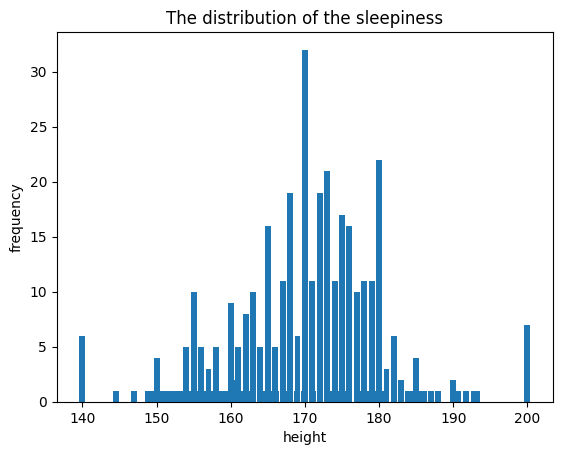

In [71]:
sleepiness_values = train_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

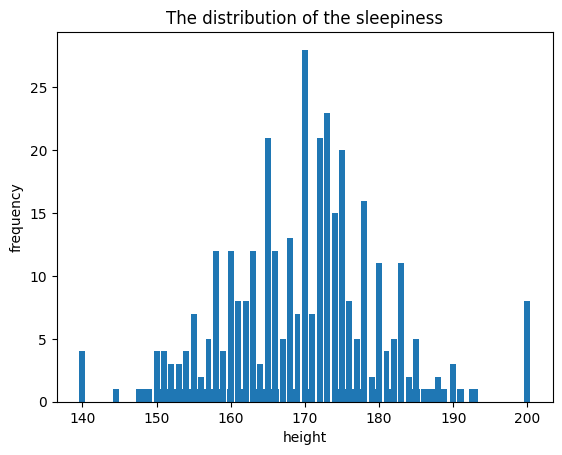

In [72]:
sleepiness_values = test_df['height'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = test_df['height'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('height')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<Axes: >

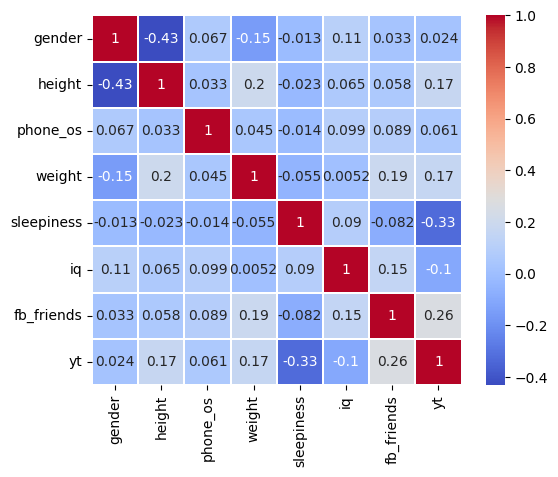

In [73]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0,cmap="coolwarm" , square=True,linecolor='white', annot=True)

<Axes: >

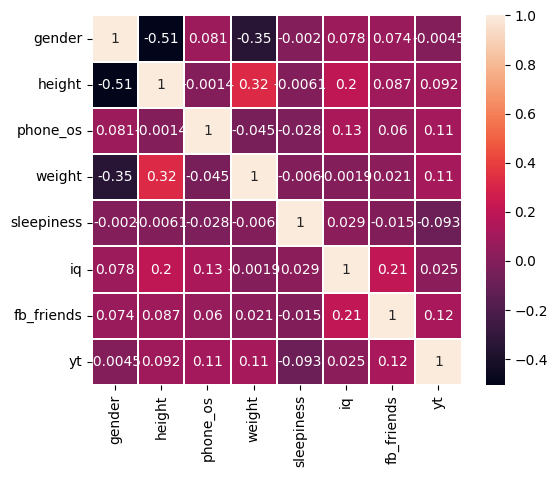

In [74]:
sns.heatmap(test_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

# **4. 編碼文字欄位(self_intro)**


In [75]:
test_df['gender'] = np.nan

<h2>4.1 TF-IDF

In [76]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [77]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,2,1,154.0,43.0,5,130.041061,583.000000,0.000000,0,0,0,0,1,Beautiful
1,2,1,156.0,47.0,4,130.000000,1801.554688,3.500000,1,0,0,0,0,Enjoying being who I'm notsss
2,1,0,170.0,61.0,3,90.000000,540.000000,256.226715,0,1,0,0,0,Practice Makes perfect
3,1,1,170.0,62.0,4,100.000000,1594.404663,5.000000,1,0,0,0,0,Straightforward
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,0,0,0,0,0,Humorous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,0,0,0,0,0,I hope i am a super hero.
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,0,0,0,0,0,NaN
420,1,1,174.0,72.0,2,122.242531,2000.000000,9.000000,1,0,0,0,1,NaN
421,2,1,167.0,50.0,3,180.000000,483.000000,10.000000,0,0,0,0,0,NaN


In [78]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,NaN,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,1,1,0,GOod
1,NaN,1,175.0,80.000000,3,155.182510,2000.000000,190.114426,1,1,0,0,1,Easygoing
2,NaN,1,155.0,45.000000,3,150.000000,1895.456787,9.000000,1,0,0,0,0,NaN
3,NaN,1,173.0,85.000000,4,123.023369,2154.898193,15.000000,1,0,0,0,1,NaN
4,NaN,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,0,0,0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1,160.0,70.000000,4,136.360428,500.000000,5.000000,0,0,0,0,1,I am a girl.
422,NaN,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,0,0,0,NaN
423,NaN,1,173.0,66.000000,4,135.000000,102.000000,11.100000,0,0,0,0,0,I like to play basketball.
424,NaN,0,165.0,53.000000,2,110.000000,507.000000,416.000000,0,1,0,0,0,Good


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [80]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,2,1,154.0,43.0,5,130.041061,583.000000,0.000000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,156.0,47.0,4,130.000000,1801.554688,3.500000,1,0,...,0.0,0.527714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,170.0,61.0,3,90.000000,540.000000,256.226715,0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,170.0,62.0,4,100.000000,1594.404663,5.000000,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,1,1,174.0,72.0,2,122.242531,2000.000000,9.000000,1,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,2,1,167.0,50.0,3,180.000000,483.000000,10.000000,0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [82]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,NaN,1,200.0,100.000000,1,87.000000,87.000000,87.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1,175.0,80.000000,3,155.182510,2000.000000,190.114426,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1,155.0,45.000000,3,150.000000,1895.456787,9.000000,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1,173.0,85.000000,4,123.023369,2154.898193,15.000000,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,164.0,57.000000,4,130.000000,505.000000,2.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1,160.0,70.000000,4,136.360428,500.000000,5.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,NaN,0,162.0,54.000000,3,180.000000,462.000000,5.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,NaN,1,173.0,66.000000,4,135.000000,102.000000,11.100000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,NaN,0,165.0,53.000000,2,110.000000,507.000000,416.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  **5. 特徵選取**

In [83]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_cols = ['gender', 'phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']
train_df_fs = train_df[selected_cols]
test_df_fs = test_df[selected_cols]

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")

資料集筆數: 423, 特徵數量: 7


## 5.1 特徵選擇

### 5.1.1 Embedded  method 嵌入式

#### 使用 RF 評估特徵

In [84]:
train_df_fs = clean_data(train_df_fs)

# 將特徵與目標分開
X = train_df_fs.drop('gender', axis=1)   # 特徵矩陣
y = train_df_fs['gender']         # 目標變數

# 將資料集切分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"訓練資料筆數: {X_train.shape[0]}, 測試資料筆數: {X_test.shape[0]}")

訓練資料筆數: 317, 測試資料筆數: 106


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5):
    results = []

    # 訓練 baseline 模型並計算全特徵的重要性
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    importances = rf_model.feature_importances_
    feature_names = X_train.columns.tolist()
    feat_imp_pairs = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    print("所有特徵的重要性排序：")
    for name, imp in feat_imp_pairs:
        print(f"{name}: {imp:.4f}")

    # 針對最重要特徵分別訓練模型
    for n in range(1, max_features + 1):
        selected_features = [f for f, imp in feat_imp_pairs[:n]]
        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "num_features": n,
            "features": selected_features,
            "accuracy": acc
        })

    return results


In [86]:
results = evaluate_top_n_features(X_train, X_test, y_train, y_test, max_features=5)

print("\n各特徵數的準確率比較：")
for r in results:
    print(f"{r['num_features']} 個特徵 → Accuracy: {r['accuracy']:.3f}, 特徵: {r['features']}")


所有特徵的重要性排序：
height: 0.3667
weight: 0.2018
fb_friends: 0.1234
iq: 0.1155
yt: 0.1131
sleepiness: 0.0521
phone_os: 0.0274

各特徵數的準確率比較：
1 個特徵 → Accuracy: 0.877, 特徵: ['height']
2 個特徵 → Accuracy: 0.830, 特徵: ['height', 'weight']
3 個特徵 → Accuracy: 0.868, 特徵: ['height', 'weight', 'fb_friends']
4 個特徵 → Accuracy: 0.868, 特徵: ['height', 'weight', 'fb_friends', 'iq']
5 個特徵 → Accuracy: 0.858, 特徵: ['height', 'weight', 'fb_friends', 'iq', 'yt']


#### XGBoost 進行特徵重要性分析

In [87]:
pip install xgboost shap matplotlib pandas scikit-learn

In [88]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


X = train_df_fs.drop('gender', axis=1).astype('float64')
y = train_df_fs['gender'].replace({1: 0, 2: 1})

X_encoded = X.copy()
for col in ['phone_os', 'sleepiness']:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:32:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 35338 (\N{CJK UNIFIED IDEOGRAPH-8A0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-89-67a054050edf>:13: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing fro

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

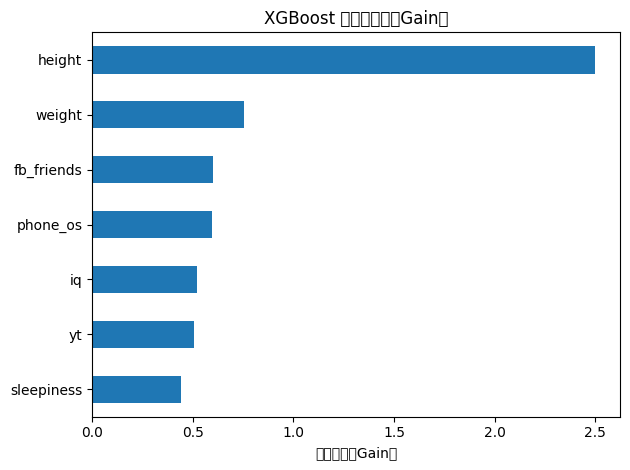

In [89]:
booster = model.get_booster()
importance_gain = booster.get_score(importance_type='gain')

# 轉成 DataFrame
importance_df = pd.DataFrame.from_dict(importance_gain, orient='index', columns=['Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=True)

# 視覺化
plt.figure(figsize=(8, 6))
importance_df.plot(kind='barh', legend=False)
plt.title('XGBoost 特徵重要性（Gain）')
plt.xlabel('資訊增益（Gain）')
plt.tight_layout()
plt.show()

### 5.1.2 Wrapper method 包裝式

#### 使用 RFE 進行特徵選取

In [90]:
pip install pandas scikit-learn matplotlib

In [91]:
train_df_fs

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1,154.0,43.0,5,130.041061,583.000000,0.000000
1,2,1,156.0,47.0,4,130.000000,1801.554688,3.500000
2,1,0,170.0,61.0,3,90.000000,540.000000,256.226715
3,1,1,170.0,62.0,4,100.000000,1594.404663,5.000000
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000
...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000
420,1,1,174.0,72.0,2,122.242531,2000.000000,9.000000
421,2,1,167.0,50.0,3,180.000000,483.000000,10.000000


In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 分離特徵與標籤
X = train_df_fs.drop('gender', axis=1)
y = train_df_fs['gender']

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [93]:
# 建立模型
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 設定要選幾個特徵（例如 5 個）
rfe = RFE(estimator=model, n_features_to_select=5)

# 套用 RFE
X_rfe = rfe.fit_transform(X_scaled, y)

# 顯示被選中的特徵
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})

print(selected_features.sort_values(by='Ranking'))

      Feature  Selected  Ranking
1      height      True        1
2      weight      True        1
5  fb_friends      True        1
4          iq      True        1
6          yt      True        1
3  sleepiness     False        2
0    phone_os     False        3


In [94]:
from sklearn.model_selection import cross_val_score

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# 再次訓練模型（用選出來的特徵）
model.fit(X_train, y_train)

scores = cross_val_score(model, X_rfe, y, cv=10, scoring='accuracy')
print(f'平均準確率：{scores.mean():.4f}')
print(f'標準差：{scores.std():.4f}')


平均準確率：0.8536
標準差：0.0551


### 5.1.3 Filter method

#### 卡方檢定

In [95]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [96]:
# 目標變數為性別
y = train_df_fs['gender'].map({1: 0, 2: 1})

# 特徵資料：排除 gender 欄
X = train_df_fs.drop(columns=['gender'])

# 特徵縮放（卡方檢定需要非負）
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 計算卡方統計量與 p 值
chi2_scores, p_values = chi2(X_scaled, y)

# 整理成 DataFrame
chi2_result = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'p_value': p_values
})

# 根據分數排序
chi2_result = chi2_result.sort_values(by='Chi2_Score', ascending=False)
print(chi2_result)


      Feature  Chi2_Score   p_value
1      height    5.181727  0.022826
2      weight    1.684470  0.194332
0    phone_os    0.579639  0.446454
4          iq    0.540420  0.462259
5  fb_friends    0.135120  0.713181
6          yt    0.119732  0.729325
3  sleepiness    0.011923  0.913051


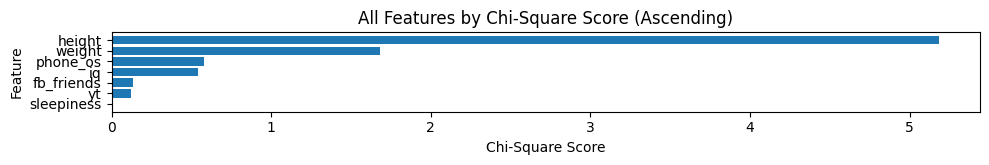

In [97]:
# 依照 Chi2 分數由小排到大
chi2_result_sorted = chi2_result.sort_values(by='Chi2_Score', ascending=True)

# 繪圖：畫出所有特徵
plt.figure(figsize=(10, len(chi2_result_sorted) * 0.25))  # 動態調整高度
plt.barh(chi2_result_sorted['Feature'], chi2_result_sorted['Chi2_Score'])
plt.xlabel('Chi-Square Score')
plt.ylabel('Feature')
plt.title('All Features by Chi-Square Score (Ascending)')
plt.tight_layout()
plt.show()


#### ANOVA

In [98]:
from sklearn.feature_selection import f_classif

# 假設你的資料如下：
X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# 計算 F 值與 p-value
f_values, p_values = f_classif(X, y)

# 建立結果表格
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print(anova_df)


      Feature    F_value       p_value
1      height  95.956990  1.513783e-20
2      weight   9.881226  1.787891e-03
4          iq   5.001209  2.585274e-02
0    phone_os   1.883079  1.707153e-01
5  fb_friends   0.453161  5.012071e-01
6          yt   0.245693  6.203826e-01
3  sleepiness   0.074207  7.854411e-01


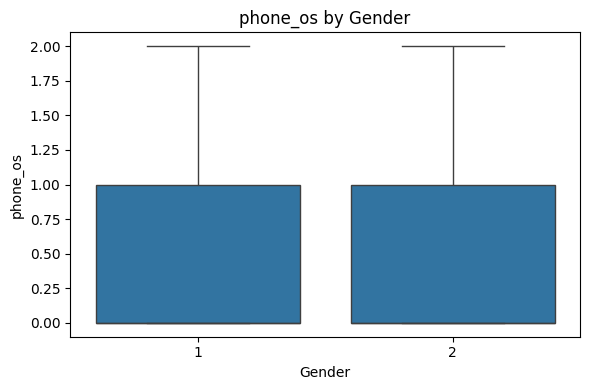

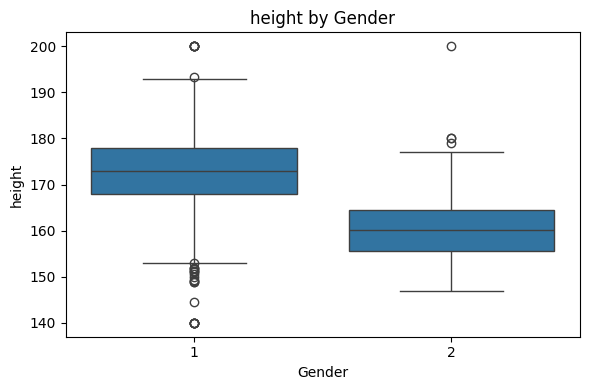

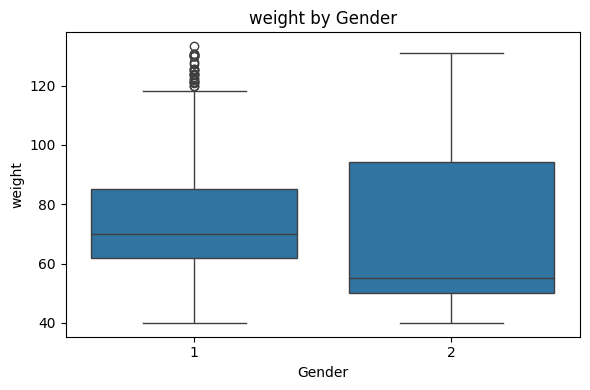

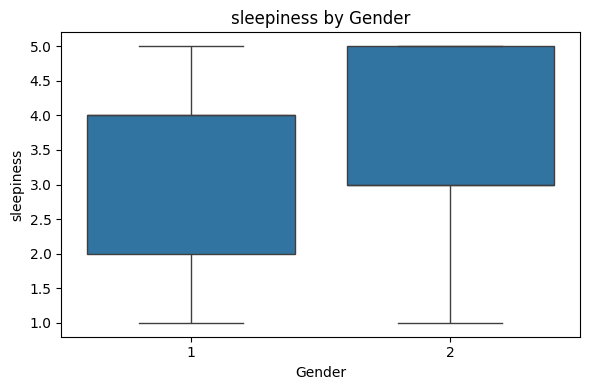

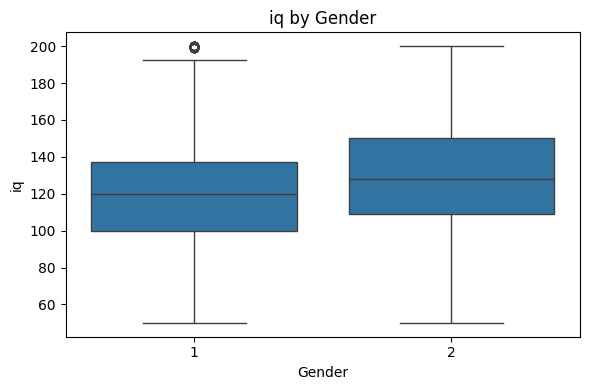

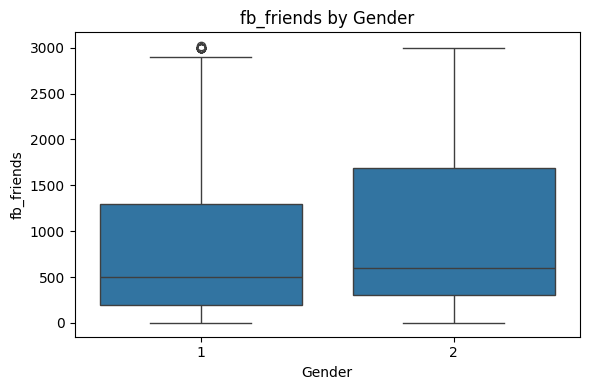

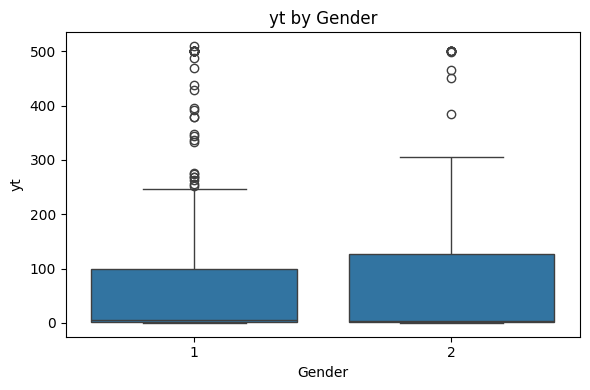

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=train_df_fs[col])
    plt.title(f'{col} by Gender')
    plt.xlabel("Gender")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### 5.1.4 SHAP（SHapley Additive exPlanations）

In [117]:
import shap
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Summary Bar Plot（平均貢獻值）
shap.plots.bar(shap_values, max_display=10)

# SHAP Summary Dot Plot（貢獻值分布圖）
shap.summary_plot(shap_values.values, X, feature_names=X.columns)

IndexError: list index out of range

## 5.2 特徵萃取

### 5.2.1 數值型欄位萃取

In [84]:
pip install featuretools

In [85]:
import featuretools as ft
from xgboost import XGBClassifier

In [86]:
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [87]:
exclude_cols = ['phone_os','gender','sleepiness']

train_df_fs['id'] = id_train_backup
test_df_fs['id'] = id_test_backup

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df_fs, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df_fs, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness,iq_x,fb_friends_x,yt_x,id,height_y,...,fb_friends - height,fb_friends - iq,fb_friends - weight,fb_friends - yt,height - iq,height - weight,height - yt,iq - weight,iq - yt,weight - yt
0,2,1,154.0,43.0,5,130.041061,583.000000,0.000000,1,154.0,...,429.000000,452.958939,540.000000,583.000000,23.958939,111.0,154.000000,87.041061,130.041061,43.000000
1,2,1,156.0,47.0,4,130.000000,1801.554688,3.500000,2,156.0,...,1645.554688,1671.554688,1754.554688,1798.054688,26.000000,109.0,152.500000,83.000000,126.500000,43.500000
2,1,0,170.0,61.0,3,90.000000,540.000000,256.226715,3,170.0,...,370.000000,450.000000,479.000000,283.773285,80.000000,109.0,-86.226715,29.000000,-166.226715,-195.226715
3,1,1,170.0,62.0,4,100.000000,1594.404663,5.000000,4,170.0,...,1424.404663,1494.404663,1532.404663,1589.404663,70.000000,108.0,165.000000,38.000000,95.000000,57.000000
4,2,0,158.0,67.0,4,128.000000,320.000000,1.200000,5,158.0,...,162.000000,192.000000,253.000000,318.800000,30.000000,91.0,156.800000,61.000000,126.800000,65.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,1000.000000,1.000000,419,166.0,...,834.000000,910.000000,934.000000,999.000000,76.000000,100.0,165.000000,24.000000,89.000000,65.000000
419,1,0,176.0,65.0,4,87.000000,1300.000000,2.000000,420,176.0,...,1124.000000,1213.000000,1235.000000,1298.000000,89.000000,111.0,174.000000,22.000000,85.000000,63.000000
420,1,1,174.0,72.0,2,122.242531,2000.000000,9.000000,421,174.0,...,1826.000000,1877.757469,1928.000000,1991.000000,51.757469,102.0,165.000000,50.242531,113.242531,63.000000
421,2,1,167.0,50.0,3,180.000000,483.000000,10.000000,422,167.0,...,316.000000,303.000000,433.000000,473.000000,-13.000000,117.0,157.000000,130.000000,170.000000,40.000000


In [88]:
# 訓練集
X_train = train_df_combined.drop(columns=['id','gender'])
X_train = clean_data(X_train)

# 測試集
X_test = test_df_combined.drop(columns=['id','gender'])  # 假設測試集也有 'id' 和 'gender'
X_test = clean_data(X_test)
y = train_df_fs['gender'].map({1: 0, 2: 1})
# 建立並訓練模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y)

# 特徵重要性
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
height_x               0.112859
fb_friends_x           0.080314
height * yt            0.047476
fb_friends - yt        0.043765
iq / weight            0.039055
height - weight        0.029268
height / iq            0.029145
fb_friends + height    0.027208
height / weight        0.025477
height + iq            0.025289
dtype: float32


In [89]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = pd.concat([train_df_combined['id'], X_train[top_10_features]], axis=1)
test_top_features = pd.concat([test_df_combined['id'], X_test[top_10_features]], axis=1)

### 5.2.2 類別型欄位萃取 (可不跑)

In [ ]:
X_fe = train_df_fs[['phone_os', 'sleepiness']]

In [ ]:
# 將兩個類別型欄位組合為一個新的交互特徵
train_fe = train_df_fs.copy()
train_fe['os_sleepiness'] = train_fe['phone_os'].astype(str) + "_" + train_fe['sleepiness'].astype(str)

# 如果 gender 是 1 = 女，2 = 男，你可以先二元化成 0/1 更直覺
train_fe['gender_binary'] =train_fe['gender'].replace({1: 0, 2: 1})

# 建立 target encoding 欄位：每種組合對應的性別平均值
train_fe['os_sleepiness_mean_gender'] = train_fe['os_sleepiness'].map(
    train_fe.groupby('os_sleepiness')['gender_binary'].mean()
)


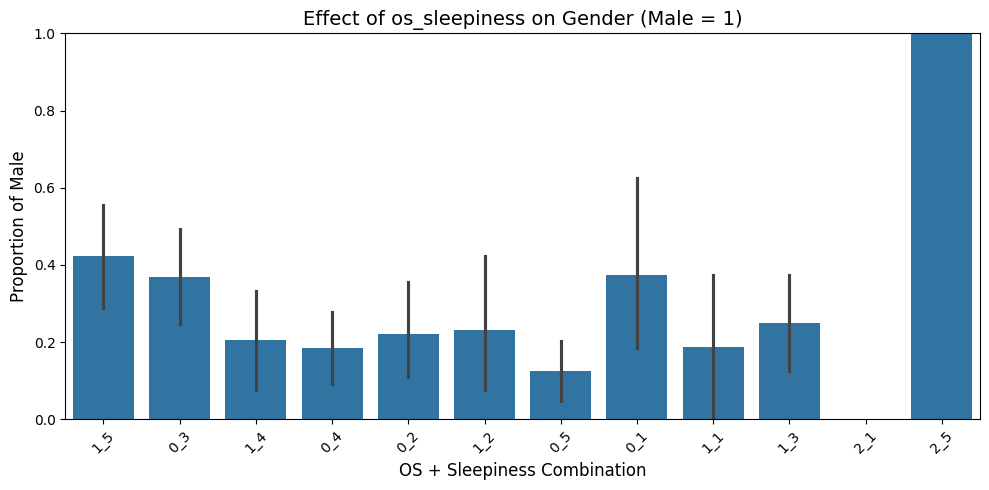

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='os_sleepiness', y='gender_binary', data=train_fe, estimator='mean')
plt.title('Effect of os_sleepiness on Gender (Male = 1)', fontsize=14)
plt.ylabel('Proportion of Male', fontsize=12)
plt.xlabel('OS + Sleepiness Combination', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### 5.2.3 TF-IDF型欄位萃取

In [90]:
drop_cols = ['phone_os', 'height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt', 'is_outlier_fb_friends',	'is_outlier_yt', 'is_outlier_height',	'is_outlier_weight',	'is_outlier_iq']

train_df_fe = train_df.drop(columns=drop_cols)
test_df_fe = test_df.drop(columns=drop_cols)

print(f"資料集筆數: {train_df_fs.shape[0]}, 特徵數量: {train_df_fs.shape[1]-1}")


資料集筆數: 423, 特徵數量: 8


In [91]:
test_df_fe

,gender,123,always,am,amazing,an,and,awesome,be,beautiful,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,0.0,0.0,0.559916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
!pip install pandas numpy scikit-learn spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 29.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [93]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df_fe.drop(columns=['gender'])
y_train = train_df_fe['gender']

X_test = test_df_fe.drop(columns=['gender'])

In [ ]:
nlp = spacy.load('en_core_web_md')
columns = X_train.columns.tolist()

# 計算相似性矩陣
similarity_matrix = np.zeros((len(columns), len(columns)))
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i != j:
            doc1 = nlp(col1)
            doc2 = nlp(col2)
            similarity_matrix[i, j] = doc1.similarity(doc2)
        else:
            similarity_matrix[i, j] = 1.0

# 根據相似性閾值（0.7）群組相似的單字
similarity_threshold = 0.7
grouped_columns = []
used_columns = set()
for i, col1 in enumerate(columns):
    if col1 in used_columns:
        continue
    similar_cols = [col1]
    for j, col2 in enumerate(columns):
        if i != j and similarity_matrix[i, j] > similarity_threshold:
            similar_cols.append(col2)
    grouped_columns.append(similar_cols)
    used_columns.update(similar_cols)

print("根據語意相似性群組的欄位：", grouped_columns)

In [112]:
k = 50
selector = SelectKBest(score_func=chi2, k=k)
X_selected_chi2 = selector.fit_transform(X_train, y_train)
selected_indices_chi2 = selector.get_support(indices=True)
chi2_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

# 從每個語意群組中選擇卡方分數最高的單字
selected_columns_final = []
for group in grouped_columns:
    group_scores = chi2_scores[chi2_scores['Feature'].isin(group)]
    if not group_scores.empty:
        best_feature = group_scores.iloc[0]['Feature']
        selected_columns_final.append(best_feature)

print("\n結合語意分析後的最終選擇欄位：", selected_columns_final)


結合語意分析後的最終選擇欄位： ['123', 'not', 'person', 'amazing', 'beautiful', 'and', 'brilliant', 'big', 'cute', 'boy', 'chika', 'color', 'common', 'haha', 'defined', 'don', 'enjoying', 'fat', 'foolish', 'free', 'girl', 'goat', 'god', 'hard', 'hi', 'hopeless', 'human', 'hungry', 'intelligent', 'kindness', 'less', 'want', 'man', 'mikoto', 'misaka', 'morning', 'nerd', 'nihilisim', 'normal', 'of', 'or', 'orange', 'others', 'people', 'positive', 'show', 'simple', 'six', 'smile', 'student', 'takami', 'the', 'tired', 'to', 'wanna', 'who', 'with', 'world', 'xd', 'you', 'zzzz']


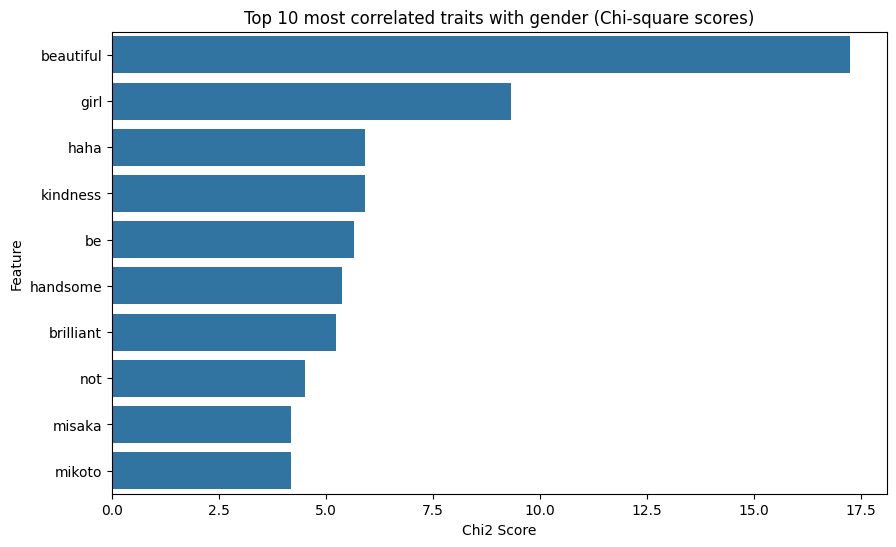

In [113]:
# 繪製前 10 個卡方分數的柱狀圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2 Score', y='Feature', data=chi2_scores.head(10))
plt.title('Top 10 most correlated traits with gender (Chi-square scores)')
plt.show()

In [114]:
group_gender_diff = []
for idx, group in enumerate(grouped_columns):
    valid_group = [col for col in group if col in X_train.columns]
    if valid_group:
        group_scores = X_train[valid_group].sum(axis=1)
        mean_gender_2 = group_scores[y_train == 2].mean() if (y_train == 2).any() else 0
        mean_gender_1 = group_scores[y_train == 1].mean() if (y_train == 1).any() else 0
        diff = mean_gender_2 - mean_gender_1
        group_gender_diff.append((idx, diff))

# 按差異值排序
group_gender_diff = sorted(group_gender_diff, key=lambda x: x[1], reverse=True)

# 選擇與 gender 2 和 gender 1 相關的群組
k_diff_groups = 10  # 選擇前 5 個群組
groups_gender_2 = [idx for idx, diff in group_gender_diff[:k_diff_groups]]  # 更可能與 gender 2 相關
groups_gender_1 = [idx for idx, diff in group_gender_diff[-k_diff_groups:]]  # 更可能與 gender 1 相關

# 創建基於群組的性別差異特徵
def create_group_gender_diff_feature(data, grouped_columns, groups_gender_2, groups_gender_1):
    new_features = pd.DataFrame(index=data.index)
    # 計算與 gender 2 相關的群組分數
    score_gender_2 = pd.Series(0, index=data.index)
    for idx in groups_gender_2:
        valid_group = [col for col in grouped_columns[idx] if col in data.columns]
        if valid_group:
            score_gender_2 += data[valid_group].sum(axis=1)
    # 計算與 gender 1 相關的群組分數
    score_gender_1 = pd.Series(0, index=data.index)
    for idx in groups_gender_1:
        valid_group = [col for col in grouped_columns[idx] if col in data.columns]
        if valid_group:
            score_gender_1 += data[valid_group].sum(axis=1)
    # 計算差異
    new_features['group_gender_diff_2_minus_1'] = score_gender_2 - score_gender_1
    return new_features

# 對訓練和測試資料創建新特徵
new_features_train_group_diff = create_group_gender_diff_feature(X_train, grouped_columns, groups_gender_2, groups_gender_1)
new_features_test_group_diff = create_group_gender_diff_feature(X_test, grouped_columns, groups_gender_2, groups_gender_1)

In [115]:
new_features_train_group_diff

,group_gender_diff_2_minus_1
0,1.000000
1,1.113289
2,0.000000
3,-1.000000
4,1.000000
...,...
418,1.378543
419,0.000000
420,0.000000
421,0.000000


In [94]:
gender_values = y_train.unique()
word_gender_means = {}
for gender in gender_values:
    gender_mask = (y_train == gender)
    gender_data = X_train[gender_mask]
    word_gender_means[gender] = gender_data.mean()

word_gender_means_df = pd.DataFrame(word_gender_means)
word_gender_means_df.columns = [f"mean_gender_{int(g)}" for g in word_gender_means_df.columns]
word_gender_diff = word_gender_means_df['mean_gender_2'] - word_gender_means_df['mean_gender_1']
word_gender_diff = word_gender_diff.sort_values(ascending=False)

print("\n單字在 gender 1 和 gender 0 間的平均 TF-IDF 分數差異（前 10 個）：")
print(word_gender_diff.head(10))
print("\n單字在 gender 1 和 gender 0 間的平均 TF-IDF 分數差異（後 10 個）：")
print(word_gender_diff.tail(10))


單字在 gender 1 和 gender 0 間的平均 TF-IDF 分數差異（前 10 個）：
beautiful    0.061158
girl         0.029509
hi           0.028480
brilliant    0.024873
kindness     0.018692
haha         0.018692
be           0.017923
who          0.015593
am           0.014463
not          0.014244
dtype: float64

單字在 gender 1 和 gender 0 間的平均 TF-IDF 分數差異（後 10 個）：
boy           -0.007924
super         -0.008224
intelligent   -0.009010
so            -0.009181
nerd          -0.011628
123           -0.012658
good          -0.012830
cool          -0.021075
man           -0.021354
handsome      -0.050262
dtype: float64


In [95]:
k_diff_words = 20
words_gender_1 = word_gender_diff.head(k_diff_words).index.tolist()
words_gender_0 = word_gender_diff.tail(k_diff_words).index.tolist()

def create_gender_diff_feature(data, words_gender_1, words_gender_0):
    new_features = pd.DataFrame(index=data.index)
    valid_words_1 = [word for word in words_gender_1 if word in data.columns]
    valid_words_0 = [word for word in words_gender_0 if word in data.columns]
    score_gender_1 = data[valid_words_1].sum(axis=1) if valid_words_1 else pd.Series(0, index=data.index)
    score_gender_0 = data[valid_words_0].sum(axis=1) if valid_words_0 else pd.Series(0, index=data.index)
    new_features['gender_diff_2_minus_1'] = score_gender_1 - score_gender_0
    return new_features

new_features_train_gender_diff = create_gender_diff_feature(X_train, words_gender_1, words_gender_0)
new_features_test_gender_diff = create_gender_diff_feature(X_test, words_gender_1, words_gender_0)

In [96]:
new_features_test_gender_diff

,gender_diff_2_minus_1
0,-1.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
421,1.388465
422,0.000000
423,0.000000
424,-1.000000


In [101]:
from sklearn.preprocessing import LabelEncoder

# 建立分類邏輯函數
def convert_direction(x):
    if x > 0:
        return '正向偏性別2'
    elif x < 0:
        return '負向偏性別1'
    else:
        return '無差異'

# 將方向分類為新欄位
new_features_train_gender_diff['gender_diff_direction'] = new_features_train_gender_diff['gender_diff_2_minus_1'].apply(convert_direction)
new_features_test_gender_diff['gender_diff_direction'] = new_features_test_gender_diff['gender_diff_2_minus_1'].apply(convert_direction)
# 使用 LabelEncoder 將分類標籤轉為整數編碼

direction_order = {
    '正向偏性別2': 0,
    '負向偏性別1': 1,
    '無差異': 2
}
new_features_train_gender_diff['gender_diff_encoded'] = new_features_train_gender_diff['gender_diff_direction'].map(direction_order)
new_features_test_gender_diff['gender_diff_encoded'] = new_features_test_gender_diff['gender_diff_direction'].map(direction_order)

In [102]:
new_features_test_gender_diff

,gender_diff_2_minus_1,gender_diff_direction,gender_diff_encoded
0,-1.000000,負向偏性別1,1
1,0.000000,無差異,2
2,0.000000,無差異,2
3,0.000000,無差異,2
4,0.000000,無差異,2
...,...,...,...
421,1.388465,正向偏性別2,0
422,0.000000,無差異,2
423,0.000000,無差異,2
424,-1.000000,負向偏性別1,1


## 5.3 K-Mean 分群

<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-157-c3cc03cbe98c>:43: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) miss

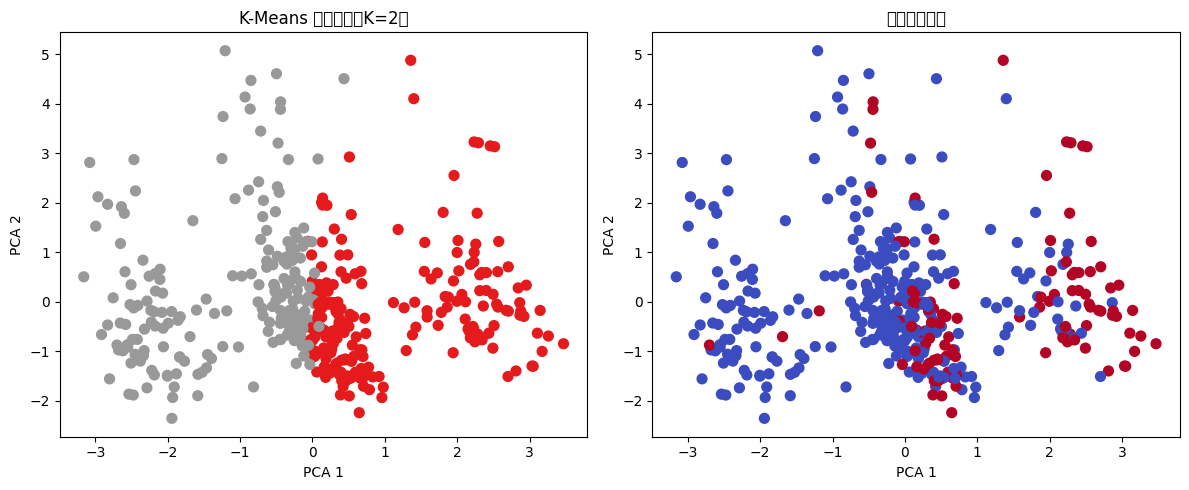

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_kmeans_with_pca(df, target_col='gender', n_clusters=2):
    # 1. 複製資料集，避免改到原始 df
    df_copy = df.copy()

    # 2. 分離特徵與目標欄位
    X = df_copy.drop(columns=[target_col])
    y = df_copy[target_col]

    # 3. 標準化特徵
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 4. 建立 KMeans 模型並進行分群
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 5. 降維：用 PCA 將資料壓到 2 維
    X_pca = PCA(n_components=2).fit_transform(X_scaled)

    # 6. 畫圖：KMeans 分群結果
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=50)
    plt.title(f"K-Means 分群結果（K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    # 7. 畫圖：真實性別結果
    plt.subplot(1, 2, 2)
    gender_numeric = y.astype('category').cat.codes
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gender_numeric, cmap='coolwarm', s=50)
    plt.title("實際性別分布")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    plt.tight_layout()
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    # 8. 回傳分群結果與 PCA 結果（如要進一步分析）
    return clusters, X_pca, result_df

clusters, pca_result, result_df = visualize_kmeans_with_pca(train_df_fs)

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris

X = train_df_fs.drop(columns=['gender'])
y = train_df_fs['gender']

# LDA降維到2個線性判別組
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

print("降維後的數據形狀:", X_lda.shape)
print(result_df['cluster'].value_counts())

降維後的數據形狀: (423, 1)
cluster
1    226
0    197
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas

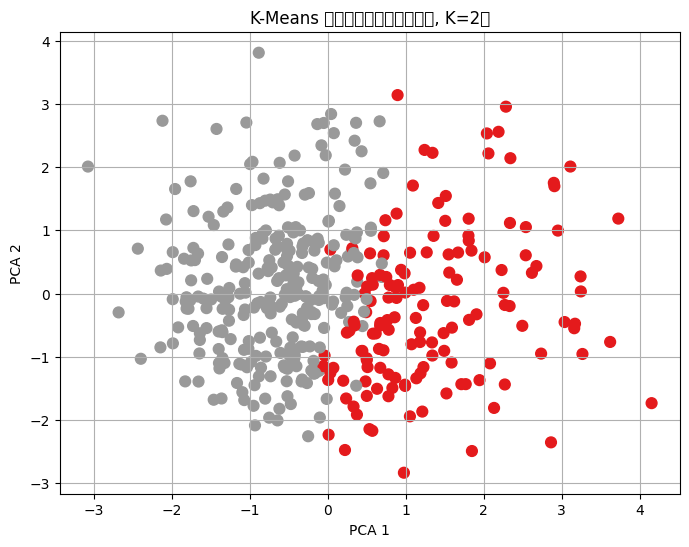

cluster
1    281
0    145
Name: count, dtype: int64


In [137]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans_all_features_plot(df, n_clusters=2):
    """
    對傳入資料集的所有數值特徵欄位進行 KMeans 分群並用 PCA 視覺化。
    """
    df = df.drop(columns=['gender'])
    # 1. 只取數值欄位（避免有非數值特徵造成錯誤）
    X = df.select_dtypes(include=['float64', 'int64']).dropna()

    # 2. 標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. 執行 KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # 4. PCA 降維（轉換成 2 維供視覺化）
    X_pca = PCA(n_components=2).fit_transform(X_scaled)


    # 5. 畫圖
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', s=60)
    plt.title(f"K-Means 分群結果（使用所有特徵, K={n_clusters}）")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()

    result_df = X.copy()
    result_df['cluster'] = clusters
    result_df['pca1'] = X_pca[:, 0]
    result_df['pca2'] = X_pca[:, 1]

    return clusters, result_df

clusters, result_df = kmeans_all_features_plot(test_df_fs, n_clusters=2)
print(result_df['cluster'].value_counts())

## 5.4 刪除+新增資料欄位

In [99]:
train_df['id'] = id_train_backup
test_df['id'] = id_test_backup

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')

train_df_fs = pd.merge(train_df_fs, train_top_features, on='id', how='left')
test_df_fs = pd.merge(test_df_fs, test_top_features, on='id', how='left')

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

In [103]:
train_df['gender_diff_encoded'] = new_features_train_gender_diff['gender_diff_encoded']
test_df['gender_diff_encoded'] = new_features_test_gender_diff['gender_diff_encoded']

#train_df['group_gender_diff_2_minus_1'] = new_features_train_group_diff['group_gender_diff_2_minus_1']
#test_df['group_gender_diff_2_minus_1'] = new_features_test_group_diff['group_gender_diff_2_minus_1']

In [104]:
train_df.drop(columns=['yt', 'fb_friends'], inplace=True)
test_df.drop(columns=['yt', 'fb_friends'], inplace=True)

#train_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)
#test_df_fs.drop(columns=['yt', 'fb_friends', 'sleepiness', 'iq', 'phone_os'], inplace=True)

In [107]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,...,fb_friends_x,height * yt,fb_friends - yt,iq / weight,height - weight,height / iq,fb_friends + height,height / weight,height + iq,gender_diff_encoded
0,NaN,1,200.0,100.000000,1,87.000000,0,1,1,1,...,87.000000,17400.00000,0.000000,0.870000,100.000000,2.298851,287.000000,2.000000,287.000000,1
1,NaN,1,175.0,80.000000,3,155.182510,1,1,0,0,...,2000.000000,33270.02449,1809.885574,1.939781,95.000000,1.127704,2175.000000,2.187500,330.182510,2
2,NaN,1,155.0,45.000000,3,150.000000,1,0,0,0,...,1895.456787,1395.00000,1886.456787,3.333333,110.000000,1.033333,2050.456787,3.444444,305.000000,2
3,NaN,1,173.0,85.000000,4,123.023369,1,0,0,0,...,2154.898193,2595.00000,2139.898193,1.447334,88.000000,1.406237,2327.898193,2.035294,296.023369,2
4,NaN,0,164.0,57.000000,4,130.000000,0,0,0,0,...,505.000000,328.00000,503.000000,2.280702,107.000000,1.261538,669.000000,2.877193,294.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1,160.0,70.000000,4,136.360428,0,0,0,0,...,500.000000,800.00000,495.000000,1.948006,90.000000,1.173361,660.000000,2.285714,296.360428,0
422,NaN,0,162.0,54.000000,3,180.000000,0,0,0,0,...,462.000000,810.00000,457.000000,3.333333,108.000000,0.900000,624.000000,3.000000,342.000000,2
423,NaN,1,173.0,66.000000,4,135.000000,0,0,0,0,...,102.000000,1920.30000,90.900000,2.045455,107.000000,1.281481,275.000000,2.621212,308.000000,2
424,NaN,0,165.0,53.000000,2,110.000000,0,1,0,0,...,507.000000,68640.00000,91.000000,2.075472,112.000000,1.500000,672.000000,3.113208,275.000000,1


# **6.資料不平衡處理**


In [108]:
print(train_df['gender'].value_counts(normalize=True))

gender
1    0.747045
2    0.252955
Name: proportion, dtype: float64


In [109]:
pip install imbalanced-learn

# 6.1 SMOTE

In [110]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,...,fb_friends_x,height * yt,fb_friends - yt,iq / weight,height - weight,height / iq,fb_friends + height,height / weight,height + iq,gender_diff_encoded
0,2,1,154.0,43.0,5,130.041061,0,0,0,0,...,583.000000,0.000000,583.000000,3.024211,111.0,1.184241,737.000000,3.581395,284.041061,0
1,2,1,156.0,47.0,4,130.000000,1,0,0,0,...,1801.554688,546.000000,1798.054688,2.765957,109.0,1.200000,1957.554688,3.319149,286.000000,0
2,1,0,170.0,61.0,3,90.000000,0,1,0,0,...,540.000000,43558.541565,283.773285,1.475410,109.0,1.888889,710.000000,2.786885,260.000000,2
3,1,1,170.0,62.0,4,100.000000,1,0,0,0,...,1594.404663,850.000000,1589.404663,1.612903,108.0,1.700000,1764.404663,2.741935,270.000000,2
4,2,0,158.0,67.0,4,128.000000,0,0,0,0,...,320.000000,189.600000,318.800000,1.910448,91.0,1.234375,478.000000,2.358209,286.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0,166.0,66.0,4,90.000000,0,0,0,0,...,1000.000000,166.000000,999.000000,1.363636,100.0,1.844444,1166.000000,2.515152,256.000000,1
419,1,0,176.0,65.0,4,87.000000,0,0,0,0,...,1300.000000,352.000000,1298.000000,1.338462,111.0,2.022989,1476.000000,2.707692,263.000000,2
420,1,1,174.0,72.0,2,122.242531,1,0,0,0,...,2000.000000,1566.000000,1991.000000,1.697813,102.0,1.423400,2174.000000,2.416667,296.242531,2
421,2,1,167.0,50.0,3,180.000000,0,0,0,0,...,483.000000,1670.000000,473.000000,3.600000,117.0,0.927778,650.000000,3.340000,347.000000,2


In [111]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = clean_data(X)
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1: 316, 0: 316})


# 6.1SMOTENN (不跑)

In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']

# 初始化 SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# 重取樣
X_smote, y_smote = smote_enn.fit_resample(X, y)

# 查看前後類別分佈
print("原始分佈：", Counter(y))
print("SMOTEENN 後：", Counter(y_resampled))

# **7. 預測分類模型**


## 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [112]:
from xgboost import XGBClassifier
#  建立模型
xg_clf = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
#    scale_pos_weight=2.04,  # 調整少數類權重
    eval_metric='logloss',
    random_state=42
)

'''
# 模型訓練
xg_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = xg_clf.predict(X_test) + 1
'''

"\n# 模型訓練\nxg_clf.fit(X_smote, y_smote)\n\n# 預測：X_test 的準備記得也要和 train_df 的欄位一致\nX_test = test_df.drop(columns=['gender']).astype(float)\n\n# 預測結果：轉回原本的 1/2 標籤\ny_test_pred = xg_clf.predict(X_test) + 1\n"

In [113]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
gender                 0
phone_os               0
height                 0
weight                 0
sleepiness             0
                      ..
height / iq            0
fb_friends + height    0
height / weight        0
height + iq            0
gender_diff_encoded    0
Length: 122, dtype: int64

Test 欄位缺失情況：
gender                 426
phone_os                 0
height                   0
weight                   0
sleepiness               0
                      ... 
height / iq              0
fb_friends + height      0
height / weight          0
height + iq              0
gender_diff_encoded      0
Length: 122, dtype: int64


## 7.2 Random forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
#    class_weight='balanced',
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)

"""
# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test)+1"""

"\n# 預測：X_test 的準備記得也要和 train_df 的欄位一致\nX_test = test_df.drop(columns=['gender']).astype(float)\nX_test = clean_data(X_test)\n\n# 預測結果：轉回原本的 1/2 標籤\ny_test_pred = rf_clf.predict(X_test)+1"

### 不要按下面 (跳到STACK)

In [ ]:
test_df['gender'] = y_test_pred

NameError: name 'y_test_pred' is not defined

In [ ]:
test_df

In [ ]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

## 7.3 Light GBM(NO)

In [ ]:
from lightgbm import LGBMClassifier
import warnings
lgb_base = LGBMClassifier(
    n_estimators=100,      # 比 RF 少一點，避免過擬合
    max_depth=7,           # 稍淺，控制模型複雜度
    min_child_samples=5,   # 類似 min_samples_leaf，增強泛化
    learning_rate=0.1,     # 適中的學習率
    num_leaves=20,         # 控制每棵樹的葉子數，小數據集不宜過多
    random_state=42,
    n_jobs=-1
)
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=UserWarning)  # 忽略特定警告
  lgb_base.fit(X_smote, y_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 316, number of negative: 316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 632, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


## 7.4 Stack

In [115]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', rf_clf),
    ('xgb', xg_clf)
]
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
# 模型訓練
stack_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)
X_test = clean_data(X_test)

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = stack_clf.predict(X_test) + 1

In [116]:
test_df['gender'] = y_test_pred
test_df

,gender,phone_os,height,weight,sleepiness,iq,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,...,fb_friends_x,height * yt,fb_friends - yt,iq / weight,height - weight,height / iq,fb_friends + height,height / weight,height + iq,gender_diff_encoded
0,1,1,200.0,100.000000,1,87.000000,0,1,1,1,...,87.000000,17400.00000,0.000000,0.870000,100.000000,2.298851,287.000000,2.000000,287.000000,1
1,1,1,175.0,80.000000,3,155.182510,1,1,0,0,...,2000.000000,33270.02449,1809.885574,1.939781,95.000000,1.127704,2175.000000,2.187500,330.182510,2
2,2,1,155.0,45.000000,3,150.000000,1,0,0,0,...,1895.456787,1395.00000,1886.456787,3.333333,110.000000,1.033333,2050.456787,3.444444,305.000000,2
3,1,1,173.0,85.000000,4,123.023369,1,0,0,0,...,2154.898193,2595.00000,2139.898193,1.447334,88.000000,1.406237,2327.898193,2.035294,296.023369,2
4,2,0,164.0,57.000000,4,130.000000,0,0,0,0,...,505.000000,328.00000,503.000000,2.280702,107.000000,1.261538,669.000000,2.877193,294.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2,1,160.0,70.000000,4,136.360428,0,0,0,0,...,500.000000,800.00000,495.000000,1.948006,90.000000,1.173361,660.000000,2.285714,296.360428,0
422,2,0,162.0,54.000000,3,180.000000,0,0,0,0,...,462.000000,810.00000,457.000000,3.333333,108.000000,0.900000,624.000000,3.000000,342.000000,2
423,1,1,173.0,66.000000,4,135.000000,0,0,0,0,...,102.000000,1920.30000,90.900000,2.045455,107.000000,1.281481,275.000000,2.621212,308.000000,2
424,1,0,165.0,53.000000,2,110.000000,0,1,0,0,...,507.000000,68640.00000,91.000000,2.075472,112.000000,1.500000,672.000000,3.113208,275.000000,1


In [117]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1,307
2,119


In [118]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_Semantic.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/predict_result/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


## 7.5 模型交叉驗證

In [119]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=5, random_state=42):
    """
    執行交叉驗證並返回多個評估指標。

    參數:
    - X: 特徵數據
    - y: 標籤數據 (假設為 1/2)
    - model: 要評估的模型
    - use_smote: 是否在交叉驗證中使用 SMOTE (True: 用 Pipeline; False: 直接用原始數據)
    - cv: 交叉驗證折數，預設為 5
    - random_state: 隨機種子

    返回:
    - metrics: 包含各指標的字典
    """
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 定義 StratifiedKFold
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_state)

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=skf, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics


In [ ]:
# 測試 1: 使用 Pipeline(有對訓練集做smote)
# metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=True)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.8818, 每折 = [0.90588235 0.91764706 0.81176471 0.83333333 0.94047619]
precision: 平均 = 0.7646, 每折 = [0.79166667 0.82608696 0.60869565 0.65217391 0.94444444]
recall: 平均 = 0.7835, 每折 = [0.86363636 0.86363636 0.66666667 0.71428571 0.80952381]
f1: 平均 = 0.7721, 每折 = [0.82608696 0.84444444 0.63636364 0.68181818 0.87179487]
roc_auc: 平均 = 0.9178, 每折 = [0.92784993 0.97041847 0.80729167 0.91005291 0.97354497]


In [ ]:
# metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=True)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
五折交叉驗證評估指標（use_smote=True）：
accuracy: 平均 = 0.9126, 每折 = [0.88235294 0.92941176 0.88235294 0.92857143 0.94047619]
precision: 平均 = 0.8150, 每折 = [0.75       0.80769231 0.78947368 0.89473684 0.83333333]
recall: 平均 = 0.8498, 每折 = [0.81818182 0.9545

In [120]:
metrics_smote = run_cross_validation(X, y, stack_clf, use_smote=True)


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stoppi